## Analysis of data  and creation of graphs

This notebook is just to analyze the data collected and plot graphs.

It does NOT compute $AP_{crit}$ nor run object detectors; it is just the code we created to process the information produced by the other notebooks.

What this notebook does, is just processing $AP_{crit}$ and related measures contained in the multiple folders created by the other notebooks and extract things; it is intended to compute statistics, create table, figures that we have inserted in the paper.

If the other notebooks have run smoothly (all of them), just set up the "path" variable as described below, and the notebook will work.

ACRONYMS (as naming in the following differs with respect to the paper)

First column is the algorithm name (as close as possible to naming in mmdetection3d), second is the abbreviation we use in our paper

- FCOSD-RESNET101              FCOS
- pointpillars-secfpn          SEC
- pointpillars-fpn             FPN
- regnet-regnetX_400MF-FPN     REG400
- ssn-SECFPN                   SSN
- regnet-regnetX_400MF-SECFPN  REGSEC (REG400SEC)
- ssn-REGNET                   SSNREG
- regnet-regnetX_FPN           REG1.6
- pgd                          PGD



Also, we have:

- D in the paper is:    $D_{max}$
- T in the paper is:        $T_{max}$
- I in the paper is:        $R_{max}$

Intuitively, 
- dist_05  is $l=0.5$
- dist_10  is $l=1$
- dist_20  is $l=2$
- dist_40  is $l=4$

In [193]:
import csv
import re
from matplotlib import cm
from tqdm import notebook
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In variable 'path', you should have folders of all object detectors i.e., one folder for each object detector you tested. In each of these folders there should be the "DATA" folder created by the previous notebooks, and filled with subfolders and all files that have been generated. In other words, or more simply:
- *this is the last notebook to be executed*
- *do not touch the various folders and files that were created. Just set the proper path below.*

The directory *path* should be organized in subfolders like, e.g.:

pointpillars-ssn

    --> DATA

        --> all the numbered folders inside DATA

fcos3d

    --> DATA

        --> all the numbered folders inside DATA

...

In [194]:
path = "/home/notebook/results_EXTENDED/" 

#if the above path is set properly, here you should change nothing
text_files = glob.glob(path + "/**/DATA/**/AP_SUMMARY.txt", recursive = True)

In [195]:
#just to plot special lines
linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or '.'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),

     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

In [196]:
#may take a bit of time (minutes)
files=[] #list of pandas dataframe
for i in text_files: 
    files.append(pd.read_csv(i, delimiter=";"))

large_df = pd.concat(files, ignore_index=True)
large_df=large_df.drop_duplicates()

Our paper uses only cars; if you want to try with other classes, change the 'car' value below

In [197]:
df=large_df.loc[large_df['class_name'] == 'car']
df["ap"]=pd.to_numeric(df["ap"])
df["ap_crit"]=pd.to_numeric(df["ap_crit"])
df["MAX_DISTANCE_OBJ"]=pd.to_numeric(df["MAX_DISTANCE_OBJ"])
df["MAX_DISTANCE_INTERSECT"]=pd.to_numeric(df["MAX_DISTANCE_INTERSECT"])
df["MAX_TIME_INTERSECT"]=pd.to_numeric(df["MAX_TIME_INTERSECT"])
df["dist_th"]=pd.to_numeric(df["dist_th"])

<ipython-input-197-d408ff351e5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ap"]=pd.to_numeric(df["ap"])
<ipython-input-197-d408ff351e5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ap_crit"]=pd.to_numeric(df["ap_crit"])
<ipython-input-197-d408ff351e5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [198]:
#seleziono dist_th=0.5
df_05=df.loc[df['dist_th'] == 0.5].drop_duplicates()

In [199]:
#seleziono dist_th=1.0
df_1=df.loc[df['dist_th'] == 1.0].drop_duplicates()

In [200]:
#seleziono dist_th=2.0
df_2=df.loc[df['dist_th'] == 2.0].drop_duplicates()

In [201]:
#seleziono dist_th=4.0
df_4=df.loc[df['dist_th'] == 4.0].drop_duplicates()

We first want to understand the maximum and minimum difference between $AP$ and $AP_{crit}$. The maximum value occurs with the object detector FCOSD1, with $AP_1$ and params D 20m, I 5m, T 2m. The minimum value is obtained with regnet-regnetX_400MF-SECFPN, $AP_{05}$, D =5 I =50 T =30. This is intuitive, as i) D=5 considers for the detection only vehicles that are very close; ii) I =50, T =30 essentially "exclude" the peculiarities of this model, as they are very large values that introduces few or no penalizations on most of the vehicle. 

In [202]:
difference=df["ap_crit"] - df["ap"]
print("max difference ap_crit - ap: ")
print(difference.max())
print("maximum value is obtained with params: ")
print(df.loc[difference.idxmax()])
print("min difference ap_crit - ap: ")
print(difference.min())
print("minimum value is obtained with params: ")
print(df.loc[difference.idxmin()])
print("average difference ap_crit - ap: ")
print(difference.sum()/len(difference))

max difference ap_crit - ap: 
0.2888211972615199
maximum value is obtained with params: 
Model                     FCOSD-RESNET101
MAX_DISTANCE_OBJ                       20
MAX_DISTANCE_INTERSECT                  5
MAX_TIME_INTERSECT                      2
class_name                            car
dist_th                               1.0
ap                               0.372487
ap_crit                          0.661308
Name: 288606, dtype: object
min difference ap_crit - ap: 
-0.015424741755332594
minimum value is obtained with params: 
Model                     ssn-SECFPN
MAX_DISTANCE_OBJ                   5
MAX_DISTANCE_INTERSECT            50
MAX_TIME_INTERSECT                30
class_name                       car
dist_th                          2.0
ap                          0.859987
ap_crit                     0.844562
Name: 93042, dtype: object
average difference ap_crit - ap: 
0.04341977568275217


We start from the above data to further understand the evolution of $AP_{crit}$ under different settings. We plot the $AP_{crit}$ when I and T varies. This show, for example: i) for regnet-regnetX_FPN, there is small change, and it is credible i.e., the more we remove objects from the target, the higher is the score; ii) PGD improve significantly with respect to the original AP. 

For larger dist_th, the difference is even smaller, and this makes PGD comparable to the other detectors. It may suggest that if the objectives are the ones stated in our paper, depending on the desired settings, also object detectors based on RGB cameras can be as relevant (or: as useful) as object detectors based on lidar. 

Now we test with regnet-regnetX_FPN, dist_th=2.0

In [203]:
regnetD0_5=df.loc[(df["Model"]=='regnet-regnetX_FPN')
       & (df["dist_th"]==2.0) #dist_th
       & (df["MAX_DISTANCE_OBJ"]==25)
      ]

regnetD0_5=regnetD0_5[["MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]]

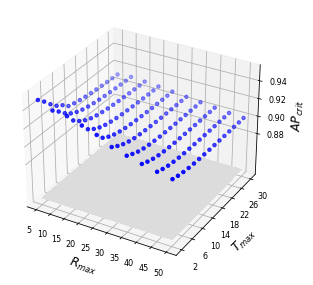

In [204]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
plot_data=regnetD0_5.to_numpy().T
#ax.set_title('regnet-regnetX_FPN');

plt.rcParams.update({'font.size': 8})

ax.set_xlabel('$R_{max}$', fontsize=12)
ax.set_ylabel('$T_{max}$', fontsize=12)
ax.set_zlabel('$AP_{crit}$', fontsize=12);
ax.tick_params(labelsize=8) # added for svg version
locs, lab = plt.xticks()  # Get the current locations and labels.
ax.set_zticks(np.arange(0.88, 0.97, step=0.02))
ax.set_xticks(np.arange(5, 51, step=5))
ax.set_yticks(np.arange(2, 31, step=4))

X=np.arange(5, 51, step=5)
Y=np.arange(2, 31, step=2)
A, B=np.meshgrid(X, Y, copy=True)

prova=np.zeros(A.shape)
#prova.fill(0.884)
prova.fill(0.84)
ax.scatter3D(plot_data[0], plot_data[1], plot_data[2], s=12, c='b',depthshade=True);
ax.plot_surface(A, B, prova, color='gainsboro', linewidth=0, antialiased=False, shade=False)
plt.savefig('paper-images/apcrit-r-t.svg')
plt.show()
#

In [205]:
with open('figure1_APCRIT.csv', 'wb') as f:
    np.savetxt(f, np.vstack((plot_data[0], plot_data[1], plot_data[2])))

Now we test with PGD, dist_th=2.0

In [206]:
pgd_fig=df.loc[(df["Model"]=='pgd')
       & (df["dist_th"]==2.0)
       & (df["MAX_DISTANCE_OBJ"]==25)
      ]

pgd_fig=pgd_fig[["MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]]

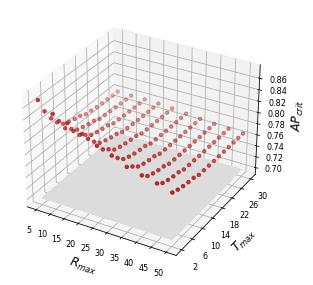

In [207]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
plot_data=pgd_fig.to_numpy().T
#ax.set_title('regnet-regnetX_FPN');

plt.rcParams.update({'font.size': 8})

ax.set_xlabel('$R_{max}$', fontsize=12)
ax.set_ylabel('$T_{max}$', fontsize=12)
ax.set_zlabel('$AP_{crit}$', fontsize=12);
ax.tick_params(labelsize=8) # added for svg version
locs, lab = plt.xticks()  # Get the current locations and labels.
ax.set_zticks(np.arange(0.40, 0.97, step=0.02))
ax.set_xticks(np.arange(5, 51, step=5))
ax.set_yticks(np.arange(2, 31, step=4))

X=np.arange(5, 51, step=5)
Y=np.arange(2, 31, step=2)
A, B=np.meshgrid(X, Y, copy=True)

prova=np.zeros(A.shape)
#prova.fill(0.884)
prova.fill(0.70)
ax.scatter3D(plot_data[0], plot_data[1], plot_data[2], s=12, c='firebrick',depthshade=True);
ax.plot_surface(A, B, prova, color='gainsboro', linewidth=0, antialiased=False, shade=False)
plt.savefig('paper-images/apcrit-r-t.svg')
plt.show()
#

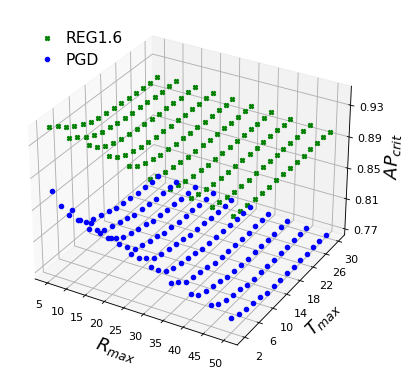

In [213]:
from matplotlib.pyplot import figure

%matplotlib inline
fig = plt.figure(figsize=(5,5), dpi=80)
plt.rcParams.update({'font.size': 10})
ax = plt.axes(projection='3d')

ax.set_xlabel('$R_{max}$', fontsize=16)
ax.set_ylabel('$T_{max}$', fontsize=16)
ax.set_zlabel('$AP_{crit}$', fontsize=16);
ax.tick_params(labelsize=10) # added for svg version

locs, lab = plt.xticks()  # Get the current locations and labels.
ax.set_zticks(np.arange(0.69, 1.0, step=0.04))
ax.set_xticks(np.arange(5, 51, step=5))
ax.set_yticks(np.arange(2, 31, step=4))

#prova=np.zeros(A.shape)
#X=np.arange(5, 51, step=5)
#Y=np.arange(2, 31, step=2)
#A, B=np.meshgrid(X, Y, copy=True)
#prova=np.zeros(A.shape)
#prova.fill(0.70)
#ax.plot_surface(A, B, prova, color='gainsboro', linewidth=0, antialiased=False, shade=False)


plot_data=regnetD0_5.to_numpy().T

ax.plot(plot_data[0], plot_data[1], plot_data[2], 'X', color='g', label='REG1.6', markersize=4);


plot_data1=pgd_fig.to_numpy().T
ax.plot(plot_data1[0], plot_data1[1], plot_data1[2], 'o', color='b', label='PGD',markersize=4)
plt.legend(loc= 'upper left', framealpha=0, borderpad=1.4, labelspacing=0.4, borderaxespad=0.1,handletextpad=0.21,
           fontsize=14)

#ax.legend()

plt.savefig('paper-images/figure2-redone.png')
plt.show()

Now we test with regnet-regnetX_FPN, dist_th=4.0

In [214]:
regnetD0_5=df.loc[(df["Model"]=='regnet-regnetX_FPN')
       & (df["dist_th"]==4.0)
       & (df["MAX_DISTANCE_INTERSECT"]==20)
      ]

regnetD0_5=regnetD0_5[["MAX_DISTANCE_OBJ", "MAX_TIME_INTERSECT", "ap_crit"]]

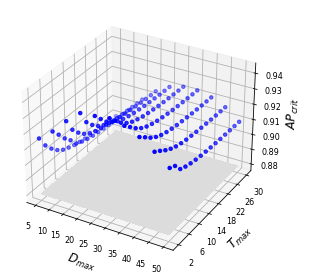

In [215]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
plot_data=regnetD0_5.to_numpy().T
#ax.set_title('regnet-regnetX_FPN');

ax.set_xlabel('$D_{max}$', fontsize=12)
ax.set_ylabel('$T_{max}$', fontsize=12)
ax.set_zlabel('$AP_{crit}$', fontsize=12);
ax.tick_params(labelsize=8) # added for svg version
locs, lab = plt.xticks()  # Get the current locations and labels.
ax.set_zticks(np.arange(0.80, 0.97, step=0.01))
ax.set_xticks(np.arange(5, 51, step=5))
ax.set_yticks(np.arange(2, 31, step=4))

X=np.arange(5, 51, step=5)
Y=np.arange(2, 31, step=2)
A, B=np.meshgrid(X, Y, copy=True)

prova=np.zeros(A.shape)
#prova.fill(0.884)
prova.fill(0.88)
ax.scatter3D(plot_data[0], plot_data[1], plot_data[2], s=12, c='b',depthshade=True);
ax.plot_surface(A, B, prova, color='gainsboro', linewidth=0, antialiased=False, shade=False)
plt.savefig('paper-images/apcrit-d-t.svg')
plt.show()

Now FCOSD, dist_th=0.5. This time, we plot D and T, while I=20.

In [216]:
FCOS1=df.loc[(df["Model"]=='FCOSD-RESNET101')
       & (df["dist_th"]==0.5)
       & (df["MAX_DISTANCE_INTERSECT"]==20)
      ]

In [217]:
FCOS1=FCOS1[["MAX_DISTANCE_OBJ", "MAX_TIME_INTERSECT", "ap_crit"]]

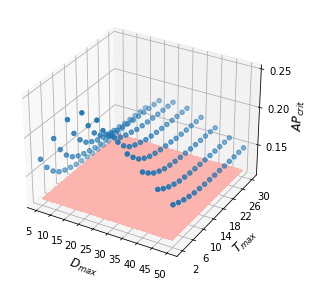

In [218]:
%matplotlib inline

plot_data=FCOS1.to_numpy().T

fig = plt.figure()
#ax.set_title('FCOSD with dist_th=0.5 and D=20');
ax = plt.axes(projection='3d')
ax.set_xlabel('$D_{max}$', fontsize=12)
ax.set_ylabel('$T_{max}$', fontsize=12)
ax.set_zlabel('$AP_{crit}$', fontsize=12);


locs, lab = plt.xticks()  # Get the current locations and labels.
ax.set_zticks(np.arange(0.1, 0.5, step=0.05))
ax.set_xticks(np.arange(5, 51, step=5))
ax.set_yticks(np.arange(2, 31, step=4))

X=np.arange(5, 51, step=5)
Y=np.arange(2, 31, step=2)
A, B=np.meshgrid(X, Y, copy=True)

prova=np.zeros(A.shape)
prova.fill(0.118)
ax.scatter3D(plot_data[0], plot_data[1], plot_data[2], cmap='Blues');
ax.plot_surface(A, B, prova, cmap='Pastel1', linewidth=0, antialiased=False)
plt.show()
#

We confirm the above resoning on a larger scale. We investigate the maximum and minimum $AP_{crit}$ for the eight object detectors and the different dist_th.

The configuration D=25, I=5, T=2 is always the most suited one, and the only exception is one case in FCOS3D. For this reason, we further explore the evolution of APs to understand how it revolves around these 3 values.

For dist_th=2 and especially dist_th=4, FCOS reduces the distance to the other algorithms.

In [219]:
model='regnet-regnetX_400MF-SECFPN'
row1max=df_05.loc[df_05["Model"]==model]["ap_crit"].max()
row2max=df_1.loc[df_1["Model"]==model]["ap_crit"].max()
row3max=df_2.loc[df_2["Model"]==model]["ap_crit"].max()
row4max=df_4.loc[df_4["Model"]==model]["ap_crit"].max()

row1=df_05.loc[(df_05["Model"]==model) & (df_05['ap_crit']==row1max)]
row2=df_1.loc[(df_1["Model"]==model) &  (df_1['ap_crit']==row2max)]
row3=df_2.loc[(df_2["Model"]==model) &  (df_2['ap_crit']==row3max)]
row4=df_4.loc[(df_4["Model"]==model) &  (df_4['ap_crit']==row4max)]

a=np.empty([4, 4], dtype=float)
a[0]=row1[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[1]=row2[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[2]=row3[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[3]=row4[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()

print("top values for "+model+" for AP05, AP1, AP2, AP4 ")
print(a)

top values for regnet-regnetX_400MF-SECFPN for AP05, AP1, AP2, AP4 
[[25.          5.          2.          0.86054355]
 [25.          5.          2.          0.92751588]
 [25.          5.          2.          0.94022885]
 [25.          5.          2.          0.94870466]]


In [220]:
model='regnet-regnetX_400MF-FPN'
row1max=df_05.loc[df_05["Model"]==model]["ap_crit"].max()
row2max=df_1.loc[df_1["Model"]==model]["ap_crit"].max()
row3max=df_2.loc[df_2["Model"]==model]["ap_crit"].max()
row4max=df_4.loc[df_4["Model"]==model]["ap_crit"].max()

row1=df_05.loc[(df_05["Model"]==model) & (df_05['ap_crit']==row1max)]
row2=df_1.loc[(df_1["Model"]==model) &  (df_1['ap_crit']==row2max)]
row3=df_2.loc[(df_2["Model"]==model) &  (df_2['ap_crit']==row3max)]
row4=df_4.loc[(df_4["Model"]==model) &  (df_4['ap_crit']==row4max)]

a=np.empty([4, 4], dtype=float)
a[0]=row1[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[1]=row2[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[2]=row3[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[3]=row4[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()

print("top values for "+model+" for AP05, AP1, AP2, AP4 ")
print(a)

top values for regnet-regnetX_400MF-FPN for AP05, AP1, AP2, AP4 
[[25.          5.          2.          0.85166856]
 [25.          5.          2.          0.93021166]
 [30.          5.          2.          0.94706064]
 [25.          5.          2.          0.95250088]]


In [221]:
model='FCOSD-RESNET101'
row1max=df_05.loc[df_05["Model"]==model]["ap_crit"].max()
row2max=df_1.loc[df_1["Model"]==model]["ap_crit"].max()
row3max=df_2.loc[df_2["Model"]==model]["ap_crit"].max()
row4max=df_4.loc[df_4["Model"]==model]["ap_crit"].max()

row1=df_05.loc[(df_05["Model"]==model) & (df_05['ap_crit']==row1max)]
row2=df_1.loc[(df_1["Model"]==model) &  (df_1['ap_crit']==row2max)]
row3=df_2.loc[(df_2["Model"]==model) &  (df_2['ap_crit']==row3max)]
row4=df_4.loc[(df_4["Model"]==model) &  (df_4['ap_crit']==row4max)]

a=np.empty([4, 4], dtype=float)
a[0]=row1[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[1]=row2[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[2]=row3[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[3]=row4[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()

print("top values for "+model+" for AP05, AP1, AP2, AP4 ")
print(a)

top values for FCOSD-RESNET101 for AP05, AP1, AP2, AP4 
[[20.          5.          2.          0.33538374]
 [20.          5.          2.          0.66130804]
 [25.          5.          2.          0.85158631]
 [25.          5.          2.          0.91070523]]


In [222]:
model='pointpillars-fpn'
row1max=df_05.loc[df_05["Model"]==model]["ap_crit"].max()
row2max=df_1.loc[df_1["Model"]==model]["ap_crit"].max()
row3max=df_2.loc[df_2["Model"]==model]["ap_crit"].max()
row4max=df_4.loc[df_4["Model"]==model]["ap_crit"].max()

row1=df_05.loc[(df_05["Model"]==model) & (df_05['ap_crit']==row1max)]
row2=df_1.loc[(df_1["Model"]==model) &  (df_1['ap_crit']==row2max)]
row3=df_2.loc[(df_2["Model"]==model) &  (df_2['ap_crit']==row3max)]
row4=df_4.loc[(df_4["Model"]==model) &  (df_4['ap_crit']==row4max)]

a=np.empty([4, 4], dtype=float)
a[0]=row1[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[1]=row2[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[2]=row3[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[3]=row4[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()

print("top values for "+model+" for AP05, AP1, AP2, AP4 ")
print(a)

top values for pointpillars-fpn for AP05, AP1, AP2, AP4 
[[25.          5.          2.          0.84721059]
 [25.          5.          2.          0.9237853 ]
 [25.          5.          2.          0.94283807]
 [30.          5.          2.          0.94859362]]


In [223]:
model='ssn-SECFPN'
row1max=df_05.loc[df_05["Model"]==model]["ap_crit"].max()
row2max=df_1.loc[df_1["Model"]==model]["ap_crit"].max()
row3max=df_2.loc[df_2["Model"]==model]["ap_crit"].max()
row4max=df_4.loc[df_4["Model"]==model]["ap_crit"].max()

row1=df_05.loc[(df_05["Model"]==model) & (df_05['ap_crit']==row1max)]
row2=df_1.loc[(df_1["Model"]==model) &  (df_1['ap_crit']==row2max)]
row3=df_2.loc[(df_2["Model"]==model) &  (df_2['ap_crit']==row3max)]
row4=df_4.loc[(df_4["Model"]==model) &  (df_4['ap_crit']==row4max)]

a=np.empty([4, 4], dtype=float)
a[0]=row1[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[1]=row2[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[2]=row3[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[3]=row4[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()

print("top values for "+model+" for AP05, AP1, AP2, AP4 ")
print(a)

top values for ssn-SECFPN for AP05, AP1, AP2, AP4 
[[25.          5.          2.          0.8622322 ]
 [25.          5.          2.          0.92730528]
 [25.          5.          2.          0.94547637]
 [25.          5.          2.          0.95012469]]


In [224]:
model='ssn-REGNET'
row1max=df_05.loc[df_05["Model"]==model]["ap_crit"].max()
row2max=df_1.loc[df_1["Model"]==model]["ap_crit"].max()
row3max=df_2.loc[df_2["Model"]==model]["ap_crit"].max()
row4max=df_4.loc[df_4["Model"]==model]["ap_crit"].max()

row1=df_05.loc[(df_05["Model"]==model) & (df_05['ap_crit']==row1max)]
row2=df_1.loc[(df_1["Model"]==model) &  (df_1['ap_crit']==row2max)]
row3=df_2.loc[(df_2["Model"]==model) &  (df_2['ap_crit']==row3max)]
row4=df_4.loc[(df_4["Model"]==model) &  (df_4['ap_crit']==row4max)]

a=np.empty([4, 4], dtype=float)
a[0]=row1[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[1]=row2[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[2]=row3[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[3]=row4[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()

print("top values for "+model+" for AP05, AP1, AP2, AP4 ")
print(a)

top values for ssn-REGNET for AP05, AP1, AP2, AP4 
[[25.          5.          2.          0.87091645]
 [25.          5.          2.          0.93190441]
 [25.          5.          2.          0.94434199]
 [25.          5.          2.          0.95261393]]


In [225]:
model='regnet-regnetX_FPN'
row1max=df_05.loc[df_05["Model"]==model]["ap_crit"].max()
row2max=df_1.loc[df_1["Model"]==model]["ap_crit"].max()
row3max=df_2.loc[df_2["Model"]==model]["ap_crit"].max()
row4max=df_4.loc[df_4["Model"]==model]["ap_crit"].max()

row1=df_05.loc[(df_05["Model"]==model) & (df_05['ap_crit']==row1max)]
row2=df_1.loc[(df_1["Model"]==model) &  (df_1['ap_crit']==row2max)]
row3=df_2.loc[(df_2["Model"]==model) &  (df_2['ap_crit']==row3max)]
row4=df_4.loc[(df_4["Model"]==model) &  (df_4['ap_crit']==row4max)]

a=np.empty([4, 4], dtype=float)
a[0]=row1[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[1]=row2[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[2]=row3[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[3]=row4[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()

print("top values for "+model+" for AP05, AP1, AP2, AP4 ")
print(a)

top values for regnet-regnetX_FPN for AP05, AP1, AP2, AP4 
[[25.          5.          2.          0.87490656]
 [25.          5.          2.          0.9369335 ]
 [25.          5.          2.          0.94963751]
 [25.          5.          2.          0.95754636]]


In [226]:
model='pointpillars-secfpn'
row1max=df_05.loc[df_05["Model"]==model]["ap_crit"].max()
row2max=df_1.loc[df_1["Model"]==model]["ap_crit"].max()
row3max=df_2.loc[df_2["Model"]==model]["ap_crit"].max()
row4max=df_4.loc[df_4["Model"]==model]["ap_crit"].max()

row1=df_05.loc[(df_05["Model"]==model) & (df_05['ap_crit']==row1max)]
row2=df_1.loc[(df_1["Model"]==model) &  (df_1['ap_crit']==row2max)]
row3=df_2.loc[(df_2["Model"]==model) &  (df_2['ap_crit']==row3max)]
row4=df_4.loc[(df_4["Model"]==model) &  (df_4['ap_crit']==row4max)]

a=np.empty([4, 4], dtype=float)
a[0]=row1[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[1]=row2[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[2]=row3[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[3]=row4[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()

print("top values for "+model+" for AP05, AP1, AP2, AP4 ")
print(a)

top values for pointpillars-secfpn for AP05, AP1, AP2, AP4 
[[25.          5.          2.          0.84376061]
 [25.          5.          2.          0.91836422]
 [25.          5.          2.          0.93347048]
 [25.          5.          2.          0.94230675]]


In [227]:
model='pgd'
row1max=df_05.loc[df_05["Model"]==model]["ap_crit"].max()
row2max=df_1.loc[df_1["Model"]==model]["ap_crit"].max()
row3max=df_2.loc[df_2["Model"]==model]["ap_crit"].max()
row4max=df_4.loc[df_4["Model"]==model]["ap_crit"].max()

row1=df_05.loc[(df_05["Model"]==model) & (df_05['ap_crit']==row1max)]
row2=df_1.loc[(df_1["Model"]==model) &  (df_1['ap_crit']==row2max)]
row3=df_2.loc[(df_2["Model"]==model) &  (df_2['ap_crit']==row3max)]
row4=df_4.loc[(df_4["Model"]==model) &  (df_4['ap_crit']==row4max)]

a=np.empty([4, 4], dtype=float)
a[0]=row1[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[1]=row2[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[2]=row3[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()
a[3]=row4[["MAX_DISTANCE_OBJ", "MAX_DISTANCE_INTERSECT", "MAX_TIME_INTERSECT", "ap_crit"]].to_numpy()

print("top values for "+model+" for AP05, AP1, AP2, AP4 ")
print(a)

top values for pgd for AP05, AP1, AP2, AP4 
[[20.          5.          2.          0.41019214]
 [20.          5.          2.          0.73223278]
 [25.          5.          2.          0.87076455]
 [20.          5.          2.          0.9217108 ]]


After studying the maximum value, we search some "reasonable" configurations and we show how they ranks.

In [228]:
model='regnet-regnetX_400MF-SECFPN'

MAX_DISTANCE_OBJ=20
MAX_DISTANCE_INTERSECT=20
MAX_TIME_INTERSECT=8

row1=df_05.loc[df_05["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_05=row1["ap_crit"]

row1=df_1.loc[df_1["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_01=row1["ap_crit"]

row1=df_2.loc[df_2["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_02=row1["ap_crit"]

row1=df_4.loc[df_4["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_04=row1["ap_crit"]

a=np.empty([4, 1], dtype=float)
a[0]=row_05
a[1]=row_01
a[2]=row_02
a[3]=row_04

print("values for "+model+" for AP05, AP1, AP2, AP4 and MAX_DISTANCE_OBJ {}, MAX_DISTANCE_INTERSECT {},MAX_TIME_INTERSECT {}".format(MAX_DISTANCE_OBJ,
                                                                                                                                     MAX_DISTANCE_INTERSECT,                                                                                                                                     MAX_TIME_INTERSECT))
print(a)

values for regnet-regnetX_400MF-SECFPN for AP05, AP1, AP2, AP4 and MAX_DISTANCE_OBJ 20, MAX_DISTANCE_INTERSECT 20,MAX_TIME_INTERSECT 8
[[0.7772658 ]
 [0.87713433]
 [0.90631975]
 [0.91635367]]


In [229]:
model='ssn-SECFPN'

MAX_DISTANCE_OBJ=20
MAX_DISTANCE_INTERSECT=20
MAX_TIME_INTERSECT=8

row1=df_05.loc[df_05["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_05=row1["ap_crit"]

row1=df_1.loc[df_1["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_01=row1["ap_crit"]

row1=df_2.loc[df_2["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_02=row1["ap_crit"]

row1=df_4.loc[df_4["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_04=row1["ap_crit"]

a=np.empty([4, 1], dtype=float)
a[0]=row_05
a[1]=row_01
a[2]=row_02
a[3]=row_04

print("values for "+model+" for AP05, AP1, AP2, AP4 and MAX_DISTANCE_OBJ {}, MAX_DISTANCE_INTERSECT {},MAX_TIME_INTERSECT {}".format(MAX_DISTANCE_OBJ,
                                                                                                                                     MAX_DISTANCE_INTERSECT,                                                                                                                                     MAX_TIME_INTERSECT))
print(a)

values for ssn-SECFPN for AP05, AP1, AP2, AP4 and MAX_DISTANCE_OBJ 20, MAX_DISTANCE_INTERSECT 20,MAX_TIME_INTERSECT 8
[[0.77173765]
 [0.87122902]
 [0.90249471]
 [0.91460608]]


In [230]:
model='ssn-REGNET'

MAX_DISTANCE_OBJ=20
MAX_DISTANCE_INTERSECT=20
MAX_TIME_INTERSECT=8

row1=df_05.loc[df_05["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_05=row1["ap_crit"]

row1=df_1.loc[df_1["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_01=row1["ap_crit"]

row1=df_2.loc[df_2["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_02=row1["ap_crit"]

row1=df_4.loc[df_4["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_04=row1["ap_crit"]

a=np.empty([4, 1], dtype=float)
a[0]=row_05
a[1]=row_01
a[2]=row_02
a[3]=row_04

print("values for "+model+" for AP05, AP1, AP2, AP4 and MAX_DISTANCE_OBJ {}, MAX_DISTANCE_INTERSECT {},MAX_TIME_INTERSECT {}".format(MAX_DISTANCE_OBJ,
                                                                                                                                     MAX_DISTANCE_INTERSECT,                                                                                                                                     MAX_TIME_INTERSECT))
print(a)

values for ssn-REGNET for AP05, AP1, AP2, AP4 and MAX_DISTANCE_OBJ 20, MAX_DISTANCE_INTERSECT 20,MAX_TIME_INTERSECT 8
[[0.79034096]
 [0.88485674]
 [0.91307733]
 [0.92368401]]


In [231]:
model='regnet-regnetX_400MF-FPN'

MAX_DISTANCE_OBJ=20
MAX_DISTANCE_INTERSECT=20
MAX_TIME_INTERSECT=8

row1=df_05.loc[df_05["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_05=row1["ap_crit"]

row1=df_1.loc[df_1["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_01=row1["ap_crit"]

row1=df_2.loc[df_2["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_02=row1["ap_crit"]

row1=df_4.loc[df_4["Model"]==model]
row1=row1.loc[row1["MAX_DISTANCE_OBJ"]==MAX_DISTANCE_OBJ]
row1=row1.loc[row1["MAX_DISTANCE_INTERSECT"]==MAX_DISTANCE_INTERSECT]
row1=row1.loc[row1["MAX_TIME_INTERSECT"]==MAX_TIME_INTERSECT]
row_04=row1["ap_crit"]

a=np.empty([4, 1], dtype=float)
a[0]=row_05
a[1]=row_01
a[2]=row_02
a[3]=row_04

print("values for "+model+" for AP05, AP1, AP2, AP4 and MAX_DISTANCE_OBJ {}, MAX_DISTANCE_INTERSECT {},MAX_TIME_INTERSECT {}".format(MAX_DISTANCE_OBJ,
                                                                                                                                     MAX_DISTANCE_INTERSECT,                                                                                                                                     MAX_TIME_INTERSECT))
print(a)

values for regnet-regnetX_400MF-FPN for AP05, AP1, AP2, AP4 and MAX_DISTANCE_OBJ 20, MAX_DISTANCE_INTERSECT 20,MAX_TIME_INTERSECT 8
[[0.7615849 ]
 [0.87651859]
 [0.90834137]
 [0.92211017]]


So we perform a 4D plot with D, I, T, and we show the corresponding values of APs. We choose regnet-regnetX_FPN  with $AP_{1}$ and  $AP_{4}$ as representative sample, but the behaviour for the other detector has similar trends. The darkest elements in the figure represents the highest AP values. It can be observed that these occurr in general in the lower part of the figure, for the lowest values of T and I, while D contributes much less on the value of AP.

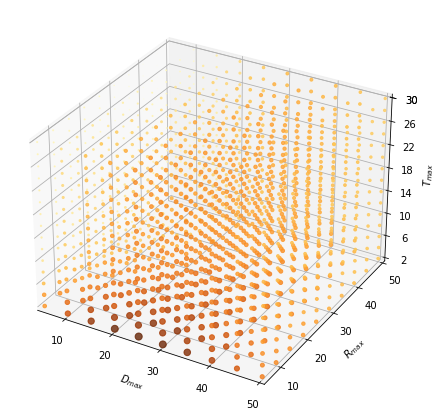

In [232]:
import matplotlib.colors as matC

model='regnet-regnetX_FPN'

a=df.loc[(df["Model"]==model) 
       & (df["dist_th"]==1.0)]

a=a[["MAX_DISTANCE_OBJ","MAX_DISTANCE_INTERSECT","MAX_TIME_INTERSECT", "ap_crit"]]
plot_data=a.to_numpy().T

#https://matplotlib.org/stable/tutorials/colors/colormaps.html
%matplotlib inline
plt.rcParams["figure.figsize"] = [6.00, 6.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
#ax.set_title(model+" with dist_th 1.0")
ax.set_xlabel('$D_{max}$')
ax.set_ylabel('$R_{max}$')
ax.set_zlabel('$T_{max}$')
ax.set_zlim([2, 30])
ax.set_xlim([5, 50])
ax.set_ylim([5, 50])
ax.set_xticks(np.arange(10, 60, 10))
ax.set_yticks(np.arange(10, 60, 10))
a=np.arange(2, 32, 4)
a=np.append(a, 30)
ax.set_zticks(a)


t=np.zeros([plot_data[3].shape[0],1])
t[:, 0]=plot_data[3]*100
b = (t - np.min(t))/np.ptp(t)

img = ax.scatter3D(plot_data[0], plot_data[1], plot_data[2], c=b*0.001,
#                 norm=matC.Normalize(vmin=0, vmax=0.2, clip=False),
                 s=b*b*50, cmap='YlOrBr', alpha=0.8)
plt.savefig('paper-images/scatter.svg')
plt.show()


In [233]:
#with open('file.csv', 'wb') as f:
#    np.savetxt(f, np.vstack((plot_data[0], plot_data[1], plot_data[2], plot_data[3])))

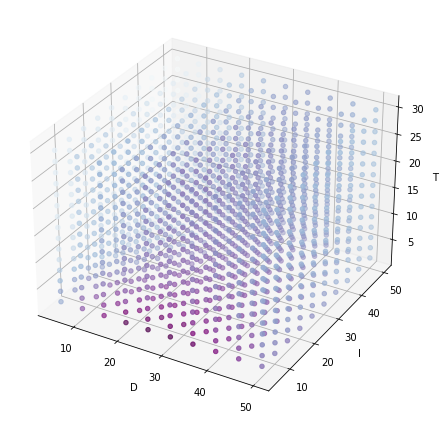

In [234]:
a=df.loc[(df["Model"]==model)
       & (df["dist_th"]==4)]

a=a[["MAX_DISTANCE_OBJ","MAX_DISTANCE_INTERSECT","MAX_TIME_INTERSECT", "ap_crit"]]
plot_data=a.to_numpy().T

%matplotlib inline
plt.rcParams["figure.figsize"] = [6.00, 6.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.set_title(model+" with dist_th 4.0")
ax.set_xlabel('D')
ax.set_ylabel('I')
ax.set_zlabel('T')


img = ax.scatter(plot_data[0],plot_data[1], plot_data[2], c=plot_data[3], cmap='BuPu')
plt.show()

We did not put much emphasis on discussing the minimum AP value. We show that the AP computed by nuscenes ranking is in general a good approximation of the lower values we get with $AP_{crit}$, under our considered settings, and especially the lowest are with D=5, I=50, T=30, dist_th=0.5, and very close to the original AP. This is reasonable.

We compute and report below the minimum $AP_{crit}$ for the different object detectors. 

The tables report on the D, I, T which lead to the minimum $AP_{crit}$, for different dist_th. We can see that the $AP_{crit}$ is rather low for high and low values of D, i.e., when D varies in the range [5, 50].

In [235]:
#this is the minimum amongst all dist_th
model='regnet-regnetX_400MF-SECFPN'
rowMin=df.loc[df["Model"]==model]["ap_crit"].min()
df.loc[(df["Model"]==model) & (df['ap_crit']==rowMin)]

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
33040,regnet-regnetX_400MF-SECFPN,5,50,30,car,0.5,0.713403,0.705203


In [236]:
#minimum for each dist_th
rowMin05=df.loc[(df["Model"]==model) &(df["dist_th"]==0.5)]["ap_crit"].min()
rowMin1=df.loc[(df["Model"]==model) &(df["dist_th"]==1)]["ap_crit"].min()
rowMin2=df.loc[(df["Model"]==model) &(df["dist_th"]==2)]["ap_crit"].min()
rowMin4=df.loc[(df["Model"]==model) &(df["dist_th"]==4)]["ap_crit"].min()

df05=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin05)]
df1=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin1)]
df2=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin2)]
df4=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin4)]
pd.concat([df05, df1, df2, df4])

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
33040,regnet-regnetX_400MF-SECFPN,5,50,30,car,0.5,0.713403,0.705203
33041,regnet-regnetX_400MF-SECFPN,5,50,30,car,1.0,0.825318,0.830027
33042,regnet-regnetX_400MF-SECFPN,5,50,30,car,2.0,0.863086,0.863316
46603,regnet-regnetX_400MF-SECFPN,5,5,30,car,4.0,0.875399,0.876527


In [237]:
model='regnet-regnetX_400MF-FPN'
rowMin=df.loc[df["Model"]==model]["ap_crit"].min()
df.loc[(df["Model"]==model) & (df['ap_crit']==rowMin)]

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
528005,regnet-regnetX_400MF-FPN,5,50,30,car,0.5,0.689879,0.679977


In [238]:
rowMin05=df.loc[(df["Model"]==model) &(df["dist_th"]==0.5)]["ap_crit"].min()
rowMin1=df.loc[(df["Model"]==model) &(df["dist_th"]==1)]["ap_crit"].min()
rowMin2=df.loc[(df["Model"]==model) &(df["dist_th"]==2)]["ap_crit"].min()
rowMin4=df.loc[(df["Model"]==model) &(df["dist_th"]==4)]["ap_crit"].min()

df05=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin05)]
df1=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin1)]
df2=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin2)]
df4=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin4)]
pd.concat([df05, df1, df2, df4])

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
528005,regnet-regnetX_400MF-FPN,5,50,30,car,0.5,0.689879,0.679977
528006,regnet-regnetX_400MF-FPN,5,50,30,car,1.0,0.827332,0.820506
541567,regnet-regnetX_400MF-FPN,5,5,30,car,2.0,0.870345,0.861646
541568,regnet-regnetX_400MF-FPN,5,5,30,car,4.0,0.884495,0.874554


In [239]:
model='FCOSD-RESNET101'
rowMin=df.loc[df["Model"]==model]["ap_crit"].min()
df.loc[(df["Model"]==model) & (df['ap_crit']==rowMin)]

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
301565,FCOSD-RESNET101,5,5,30,car,0.5,0.118029,0.112694


In [240]:
rowMin05=df.loc[(df["Model"]==model) &(df["dist_th"]==0.5)]["ap_crit"].min()
rowMin1=df.loc[(df["Model"]==model) &(df["dist_th"]==1)]["ap_crit"].min()
rowMin2=df.loc[(df["Model"]==model) &(df["dist_th"]==2)]["ap_crit"].min()
rowMin4=df.loc[(df["Model"]==model) &(df["dist_th"]==4)]["ap_crit"].min()

df05=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin05)]
df1=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin1)]
df2=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin2)]
df4=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin4)]
pd.concat([df05, df1, df2, df4])

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
301565,FCOSD-RESNET101,5,5,30,car,0.5,0.118029,0.112694
288006,FCOSD-RESNET101,5,50,30,car,1.0,0.372487,0.378923
288007,FCOSD-RESNET101,5,50,30,car,2.0,0.655298,0.672763
288008,FCOSD-RESNET101,5,50,30,car,4.0,0.804040,0.810680


In [241]:
model='pointpillars-fpn'
rowMin=df.loc[df["Model"]==model]["ap_crit"].min()
df.loc[(df["Model"]==model) & (df['ap_crit']==rowMin)]

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
468005,pointpillars-fpn,5,50,30,car,0.5,0.681983,0.676663


In [242]:
rowMin05=df.loc[(df["Model"]==model) &(df["dist_th"]==0.5)]["ap_crit"].min()
rowMin1=df.loc[(df["Model"]==model) &(df["dist_th"]==1)]["ap_crit"].min()
rowMin2=df.loc[(df["Model"]==model) &(df["dist_th"]==2)]["ap_crit"].min()
rowMin4=df.loc[(df["Model"]==model) &(df["dist_th"]==4)]["ap_crit"].min()

df05=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin05)]
df1=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin1)]
df2=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin2)]
df4=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin4)]
pd.concat([df05, df1, df2, df4])

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
468005,pointpillars-fpn,5,50,30,car,0.5,0.681983,0.676663
468006,pointpillars-fpn,5,50,30,car,1.0,0.814450,0.809991
468007,pointpillars-fpn,5,50,30,car,2.0,0.856673,0.852996
457448,pointpillars-fpn,5,5,24,car,4.0,0.872438,0.868428


In [243]:
model='ssn-SECFPN'
rowMin=df.loc[df["Model"]==model]["ap_crit"].min()
df.loc[(df["Model"]==model) & (df['ap_crit']==rowMin)]

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
93040,ssn-SECFPN,5,50,30,car,0.5,0.696173,0.684419


In [244]:
rowMin05=df.loc[(df["Model"]==model) &(df["dist_th"]==0.5)]["ap_crit"].min()
rowMin1=df.loc[(df["Model"]==model) &(df["dist_th"]==1)]["ap_crit"].min()
rowMin2=df.loc[(df["Model"]==model) &(df["dist_th"]==2)]["ap_crit"].min()
rowMin4=df.loc[(df["Model"]==model) &(df["dist_th"]==4)]["ap_crit"].min()

df05=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin05)]
df1=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin1)]
df2=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin2)]
df4=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin4)]
pd.concat([df05, df1, df2, df4])

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
93040,ssn-SECFPN,5,50,30,car,0.5,0.696173,0.684419
93041,ssn-SECFPN,5,50,30,car,1.0,0.817666,0.803032
93042,ssn-SECFPN,5,50,30,car,2.0,0.859987,0.844562
93043,ssn-SECFPN,5,50,30,car,4.0,0.875779,0.860521


In [245]:
model='ssn-REGNET'
rowMin=df.loc[df["Model"]==model]["ap_crit"].min()
df.loc[(df["Model"]==model) & (df['ap_crit']==rowMin)]

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
408005,ssn-REGNET,5,50,30,car,0.5,0.717293,0.712712


In [246]:
rowMin05=df.loc[(df["Model"]==model) &(df["dist_th"]==0.5)]["ap_crit"].min()
rowMin1=df.loc[(df["Model"]==model) &(df["dist_th"]==1)]["ap_crit"].min()
rowMin2=df.loc[(df["Model"]==model) &(df["dist_th"]==2)]["ap_crit"].min()
rowMin4=df.loc[(df["Model"]==model) &(df["dist_th"]==4)]["ap_crit"].min()

df05=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin05)]
df1=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin1)]
df2=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin2)]
df4=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin4)]
pd.concat([df05, df1, df2, df4])

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
408005,ssn-REGNET,5,50,30,car,0.5,0.717293,0.712712
408006,ssn-REGNET,5,50,30,car,1.0,0.835426,0.832253
384447,ssn-REGNET,5,10,30,car,2.0,0.872312,0.867551
384448,ssn-REGNET,5,10,30,car,4.0,0.886480,0.879944


In [247]:
model='regnet-regnetX_FPN'
rowMin=df.loc[df["Model"]==model]["ap_crit"].min()
df.loc[(df["Model"]==model) & (df['ap_crit']==rowMin)]

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
161527,regnet-regnetX_FPN,5,50,30,car,0.5,0.721959,0.707188


In [248]:
rowMin05=df.loc[(df["Model"]==model) &(df["dist_th"]==0.5)]["ap_crit"].min()
rowMin1=df.loc[(df["Model"]==model) &(df["dist_th"]==1)]["ap_crit"].min()
rowMin2=df.loc[(df["Model"]==model) &(df["dist_th"]==2)]["ap_crit"].min()
rowMin4=df.loc[(df["Model"]==model) &(df["dist_th"]==4)]["ap_crit"].min()

df05=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin05)]
df1=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin1)]
df2=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin2)]
df4=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin4)]
pd.concat([df05, df1, df2, df4])

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
161527,regnet-regnetX_FPN,5,50,30,car,0.5,0.721959,0.707188
161528,regnet-regnetX_FPN,5,50,30,car,1.0,0.836876,0.826376
161529,regnet-regnetX_FPN,5,50,30,car,2.0,0.874415,0.864116
161530,regnet-regnetX_FPN,5,50,30,car,4.0,0.889193,0.879190


In [249]:
model='pointpillars-secfpn'
rowMin=df.loc[df["Model"]==model]["ap_crit"].min()
df.loc[(df["Model"]==model) & (df['ap_crit']==rowMin)]

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
348005,pointpillars-secfpn,5,50,30,car,0.5,0.677324,0.673152


In [250]:
rowMin05=df.loc[(df["Model"]==model) &(df["dist_th"]==0.5)]["ap_crit"].min()
rowMin1=df.loc[(df["Model"]==model) &(df["dist_th"]==1)]["ap_crit"].min()
rowMin2=df.loc[(df["Model"]==model) &(df["dist_th"]==2)]["ap_crit"].min()
rowMin4=df.loc[(df["Model"]==model) &(df["dist_th"]==4)]["ap_crit"].min()

df05=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin05)]
df1=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin1)]
df2=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin2)]
df4=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin4)]
pd.concat([df05, df1, df2, df4])

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
348005,pointpillars-secfpn,5,50,30,car,0.5,0.677324,0.673152
348006,pointpillars-secfpn,5,50,30,car,1.0,0.795721,0.794846
348007,pointpillars-secfpn,5,50,30,car,2.0,0.833460,0.836896
348008,pointpillars-secfpn,5,50,30,car,4.0,0.851608,0.851859


In [251]:
model='pgd'
rowMin=df.loc[df["Model"]==model]["ap_crit"].min()
df.loc[(df["Model"]==model) & (df['ap_crit']==rowMin)]

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
228005,pgd,5,50,30,car,0.5,0.172384,0.1714


In [252]:
rowMin05=df.loc[(df["Model"]==model) &(df["dist_th"]==0.5)]["ap_crit"].min()
rowMin1=df.loc[(df["Model"]==model) &(df["dist_th"]==1)]["ap_crit"].min()
rowMin2=df.loc[(df["Model"]==model) &(df["dist_th"]==2)]["ap_crit"].min()
rowMin4=df.loc[(df["Model"]==model) &(df["dist_th"]==4)]["ap_crit"].min()

df05=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin05)]
df1=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin1)]
df2=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin2)]
df4=df.loc[(df["Model"]==model) & (df['ap_crit']== rowMin4)]
pd.concat([df05, df1, df2, df4])

,Model,MAX_DISTANCE_OBJ,MAX_DISTANCE_INTERSECT,MAX_TIME_INTERSECT,class_name,dist_th,ap,ap_crit
228005,pgd,5,50,30,car,0.5,0.172384,0.171400
228006,pgd,5,50,30,car,1.0,0.449519,0.457847
241567,pgd,5,5,30,car,2.0,0.702628,0.703752
196848,pgd,5,5,26,car,4.0,0.827676,0.816487


Next, we explore the number of elements with inverted rankings (this means: we have the nominal ranking of the detectors, achieved with AP; when we compute $AP_{crit}$, we can as well rank the detectors). We are aware that we have a total of 1500 different values for each model, D, I and T value. This corresponds, obviously, to 1500 different rankings for each dist_th (0.5, 1.0, 2.0, 4.0). We compute the rankings, and we highlight how many presented a different order between the  criticality ranking and the nominal ranking.

In [253]:
VARIOUS_DISTANCE_OBJ_ARRAY=[]
VARIOUS_DISTANCE_OBJ_ARRAY.extend(range(5, 51, 5))
VARIOUS_DISTANCE_INTERSECT_ARRAY=[]
VARIOUS_DISTANCE_INTERSECT_ARRAY.extend(range(5, 51, 5))
VARIOUS_TIME_INTERSECT_ARRAY=[]
VARIOUS_TIME_INTERSECT_ARRAY.extend(range(2,31,2))

import itertools
a = [VARIOUS_DISTANCE_OBJ_ARRAY,VARIOUS_DISTANCE_INTERSECT_ARRAY,VARIOUS_TIME_INTERSECT_ARRAY]
combined_list=list(itertools.product(*a))
triple=np.array(combined_list)

In [254]:
df_tmp=df_05

res=np.empty([0,1])
res1=np.empty([0,9])

for i in triple:
    s1=df_tmp.loc[(df_tmp["MAX_DISTANCE_OBJ"]==i[0]) 
       & (df_tmp["MAX_DISTANCE_INTERSECT"]==i[1]) 
       & (df_tmp["MAX_TIME_INTERSECT"]==i[2])]
    s1=s1.sort_values(by="ap", inplace=False)
    if(s1.shape[0]!=9):
#        print(s1)
        print("Error; no big problem, but a folder is missing")
    elif((s1["ap_crit"].is_monotonic) & (s1["ap"].is_monotonic)):
        c=0 #null
    else:
        s2n=s1.sort_values(by="ap", inplace=False)["ap"].to_numpy() #ap, ordinata
        s3n=s1.sort_values(by="ap_crit", inplace=False)["ap"].to_numpy() #ap, ordinata secondo ap_crit        
        s3n_crit=s1.sort_values(by="ap", inplace=False)["ap_crit"].to_numpy() #ap_crit ordinata secondo ap        
        
        res=np.append(res, np.count_nonzero(s2n-s3n))
        res1=np.vstack([res1, s2n-s3n])
#        if(np.count_nonzero(s2n-s3n)>3): #Uncomment this to get configurations where there is inverted rankings of 1, 2, .. n positions
#            print(i)
#            print(s1)
#            print (s3n_crit)

print("for dist_th=0.5 the total inverted rankings, out of 1500, are " + str(len(res)))
print("for dist_th=0.5 the inversion are of entities number: " + str(np.unique(res)))
print("the involved ranking positions are in position (counting from 0 to 8): " + str(np.nonzero(np.sum(res1, axis=0))))

for dist_th=0.5 the total inverted rankings, out of 1500, are 567
for dist_th=0.5 the inversion are of entities number: [2. 4.]
the involved ranking positions are in position (counting from 0 to 8): (array([2, 3, 4, 5, 6, 7, 8]),)


In [255]:
df_tmp=df_1

res=np.empty([0,1])
res1=np.empty([0,9])

for i in triple:
    s1=df_tmp.loc[(df_tmp["MAX_DISTANCE_OBJ"]==i[0]) 
       & (df_tmp["MAX_DISTANCE_INTERSECT"]==i[1]) 
       & (df_tmp["MAX_TIME_INTERSECT"]==i[2])]
    s1=s1.sort_values(by="ap", inplace=False)
    if(s1.shape[0]!=9):
        #print(s1)
        print("Error; no big problem, but a folder is missing")
    elif((s1["ap_crit"].is_monotonic) & (s1["ap"].is_monotonic)):
        c=0 #null
    else:
        s2n=s1.sort_values(by="ap", inplace=False)["ap"].to_numpy() #ap, ordinata
        s3n=s1.sort_values(by="ap_crit", inplace=False)["ap"].to_numpy() #ap, ordinata secondo ap_crit        
        s3n_crit=s1.sort_values(by="ap", inplace=False)["ap_crit"].to_numpy() #ap_crit ordinata secondo ap        
        
        res=np.append(res, np.count_nonzero(s2n-s3n))
        res1=np.vstack([res1, s2n-s3n])
#        if(np.count_nonzero(s2n-s3n)>5): #Uncomment this to get configurations where there is inverted rankings of 1, 2, .. n positions
#            print(i)
#            print(s1)
#            print (s3n_crit)


print("for dist_th=0.5 the total inverted rankings, out of 1500, are " + str(len(res)))
print("for dist_th=0.5 the inversion are of entities number: " + str(np.unique(res)))
print("the involved ranking positions are in position (counting from 0 to 8): " + str(np.nonzero(np.sum(res1, axis=0))))

for dist_th=0.5 the total inverted rankings, out of 1500, are 1256
for dist_th=0.5 the inversion are of entities number: [2. 3. 4. 5. 6.]
the involved ranking positions are in position (counting from 0 to 8): (array([3, 4, 5, 6, 7, 8]),)


In [256]:
df_tmp=df_2

res=np.empty([0,1])
res1=np.empty([0,9])

for i in triple:
    s1=df_tmp.loc[(df_tmp["MAX_DISTANCE_OBJ"]==i[0]) 
       & (df_tmp["MAX_DISTANCE_INTERSECT"]==i[1]) 
       & (df_tmp["MAX_TIME_INTERSECT"]==i[2])]
    
    s1=s1.sort_values(by="ap", inplace=False)
    if(s1.shape[0]!=9):
        print("Error; no big problem, but a folder is missing")
    elif((s1["ap_crit"].is_monotonic) & (s1["ap"].is_monotonic)):
        c=0 #null
    else:
        s2n=s1.sort_values(by="ap", inplace=False)["ap"].to_numpy() #ap, ordinata
        s3n=s1.sort_values(by="ap_crit", inplace=False)["ap"].to_numpy() #ap, ordinata secondo ap_crit        
        s3n_crit=s1.sort_values(by="ap", inplace=False)["ap_crit"].to_numpy() #ap_crit ordinata secondo ap        
        
        res=np.append(res, np.count_nonzero(s2n-s3n))
        res1=np.vstack([res1, s2n-s3n])
#        if(np.count_nonzero(s2n-s3n)>5): #Uncomment this to get configurations where there is inverted rankings of 1, 2, .. n positions
#            print(i)
#            print(s1)
#            print (s3n_crit)

print("for dist_th=2.0 the total inverted rankings, out of 1500, are " + str(len(res)))
print("the inversion are of entities number: " + str(np.unique(res)))
print("the involved ranking positions are in position (counting from 0 to 8): " + str(np.nonzero(np.sum(res1, axis=0))))

for dist_th=2.0 the total inverted rankings, out of 1500, are 1064
the inversion are of entities number: [2. 3. 4. 5. 6.]
the involved ranking positions are in position (counting from 0 to 8): (array([3, 4, 5, 6, 7, 8]),)


In [257]:
df_tmp=df_4

res=np.empty([0,1])
res1=np.empty([0,9])

for i in triple:
    s1=df_tmp.loc[(df_tmp["MAX_DISTANCE_OBJ"]==i[0]) 
       & (df_tmp["MAX_DISTANCE_INTERSECT"]==i[1]) 
       & (df_tmp["MAX_TIME_INTERSECT"]==i[2])]
    
    s1=s1.sort_values(by="ap", inplace=False)
    if(s1.shape[0]!=9):
        print("Error; no big problem, but a folder is missing")
    elif((s1["ap_crit"].is_monotonic) & (s1["ap"].is_monotonic)):
        c=0 #null
    else:
        s2n=s1.sort_values(by="ap", inplace=False)["ap"].to_numpy() #ap, ordinata
        s3n=s1.sort_values(by="ap_crit", inplace=False)["ap"].to_numpy() #ap, ordinata secondo ap_crit        
        s3n_crit=s1.sort_values(by="ap", inplace=False)["ap_crit"].to_numpy() #ap_crit ordinata secondo ap        
        
        res=np.append(res, np.count_nonzero(s2n-s3n))
        res1=np.vstack([res1, s2n-s3n])

#        if(s3n_crit[0] > s3n_crit[1]):# uncomment to find cases in which FCOS and PGD are inverted
#            print(i)
        
#        if(np.count_nonzero(s2n-s3n)>5): #Uncomment this to get configurations where there is inverted rankings of 1, 2, .. n positions
#            print(i)
#            print(s1)
#            print (s3n_crit)

print("for dist_th=4.0 the total inverted rankings, out of 1500, are " + str(len(res)))
print("the inversion are of entities number: " + str(np.unique(res)))
print("the involved ranking positions are in position (counting from 0 to 8): " + str(np.nonzero(np.sum(res1, axis=0))))

for dist_th=4.0 the total inverted rankings, out of 1500, are 1425
the inversion are of entities number: [2. 3. 4. 5. 6.]
the involved ranking positions are in position (counting from 0 to 8): (array([0, 1, 2, 3, 4, 5, 6, 7, 8]),)


### Finally, we create some figures.

We better investigate the behaviour of D, I and T. We fix 2 out of the three parameters, and we show in the graphs below how the remaining parameter varies, for the different object detectors. What we can observe is that the trends are essentially the same for all object detectors, with just some small differences. These differences lead to the inversion of rankings between $AP$ and $AP_{crit}$.

The higher the $dist_{th}$, the more evident is the trend. Raising $dist_{th}$ corresponds to an increased number of detections that are established as "correct detection", and also to higher differences between the object detectors. This corresponds to the higher differences between $AP$s with an higher $dist_{th}$.

It is interesting that the trend in D shows a peak, rather than a smoothed curve. With D=25 the $AP_{crit}$ has the maximum value.

In [258]:
y1='regnet-regnetX_400MF-SECFPN'
y2='regnet-regnetX_400MF-FPN'
y3='FCOSD-RESNET101'
y4='pointpillars-fpn'
y5='ssn-SECFPN'
y6='ssn-REGNET'
y7='regnet-regnetX_FPN'
y8='pointpillars-secfpn'
y9='pgd'

y_tot=[y1, y2, y3, y4, y5, y6, y7,y8,y9]

In [259]:
#build labels
Ly1='REG400SEC'
Ly2='REG400'
Ly3='FCOS'
Ly4='FPN'
Ly5='SSN'
Ly6='SSNREG'
Ly7='REG1.6'
Ly8='SEC'
Ly9='PGD'
ylabel=[Ly1, Ly2, Ly3, Ly4, Ly5, Ly6, Ly7, Ly8,Ly9]

In [260]:
y_tot

['regnet-regnetX_400MF-SECFPN',
 'regnet-regnetX_400MF-FPN',
 'FCOSD-RESNET101',
 'pointpillars-fpn',
 'ssn-SECFPN',
 'ssn-REGNET',
 'regnet-regnetX_FPN',
 'pointpillars-secfpn',
 'pgd']

We set D, I, and we plot T

/home/notebook/anaconda3/envs/notebook/lib/python3.9/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


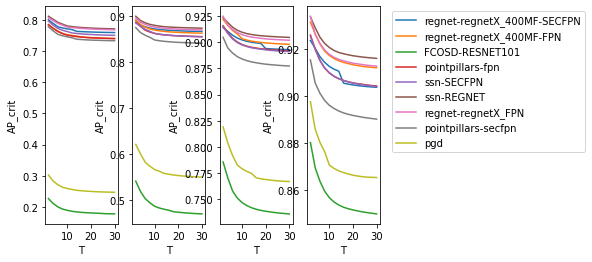

In [261]:
%matplotlib inline
D=[20]
I=[25]
T=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
x_label='T'

plt.subplot(1, 4, 1)
plt.xlabel(x_label)
plt.ylabel('AP_crit');

dataset=df_05
for y in y_tot:
    a=dataset
    a=a.loc[a["MAX_TIME_INTERSECT"].isin(T)]
    a=a.loc[a["MAX_DISTANCE_INTERSECT"].isin(I)]
    a=a.loc[(a["MAX_DISTANCE_OBJ"].isin(D))]# & (a["MAX_DISTANCE_OBJ"]<=30)]
    a=a.loc[a["Model"]==y]
    a=a[["MAX_DISTANCE_OBJ","MAX_DISTANCE_INTERSECT","MAX_TIME_INTERSECT", "ap_crit"]]
    a=a.sort_values(by="MAX_TIME_INTERSECT")
    plot_data=a.to_numpy().T
    
    plt.plot(plot_data[2], plot_data[3], label=y);

plt.subplot(1, 4, 2)
plt.xlabel(x_label)
plt.ylabel('AP_crit');

dataset=df_1
for y in y_tot:
    a=dataset
    a=a.loc[a["MAX_TIME_INTERSECT"].isin(T)]
    a=a.loc[a["MAX_DISTANCE_INTERSECT"].isin(I)]
    a=a.loc[(a["MAX_DISTANCE_OBJ"].isin(D))]# & (a["MAX_DISTANCE_OBJ"]<=30)]
    a=a.loc[a["Model"]==y]
    a=a[["MAX_DISTANCE_OBJ","MAX_DISTANCE_INTERSECT","MAX_TIME_INTERSECT", "ap_crit"]]
    a=a.sort_values(by="MAX_TIME_INTERSECT")
    plot_data=a.to_numpy().T
    plt.plot(plot_data[2], plot_data[3], label=y);
    
plt.subplot(1, 4, 3)
plt.xlabel(x_label)
plt.ylabel('AP_crit');

dataset=df_2
for y in y_tot:
    a=dataset
    a=a.loc[a["MAX_TIME_INTERSECT"].isin(T)]
    a=a.loc[a["MAX_DISTANCE_INTERSECT"].isin(I)]
    a=a.loc[(a["MAX_DISTANCE_OBJ"].isin(D))]# & (a["MAX_DISTANCE_OBJ"]<=30)]
    a=a.loc[a["Model"]==y]
    a=a[["MAX_DISTANCE_OBJ","MAX_DISTANCE_INTERSECT","MAX_TIME_INTERSECT", "ap_crit"]]
    a=a.sort_values(by="MAX_TIME_INTERSECT")
    plot_data=a.to_numpy().T
    plt.plot(plot_data[2], plot_data[3], label=y);
#plt.legend()

plt.subplot(1, 4, 4)
plt.xlabel(x_label)
plt.ylabel('AP_crit');

dataset=df_4
for y in y_tot:
    a=dataset
    a=a.loc[a["MAX_TIME_INTERSECT"].isin(T)]
    a=a.loc[a["MAX_DISTANCE_INTERSECT"].isin(I)]
    a=a.loc[(a["MAX_DISTANCE_OBJ"].isin(D))]# & (a["MAX_DISTANCE_OBJ"]<=30)]
    a=a.loc[a["Model"]==y]
    a=a[["MAX_DISTANCE_OBJ","MAX_DISTANCE_INTERSECT","MAX_TIME_INTERSECT", "ap_crit"]]
    a=a.sort_values(by="MAX_TIME_INTERSECT")
    plot_data=a.to_numpy().T
    plt.plot(plot_data[2], plot_data[3], label=y);

plt.legend(bbox_to_anchor=(1.1, 1.00))

plt.show()

We set I, T and we plot D

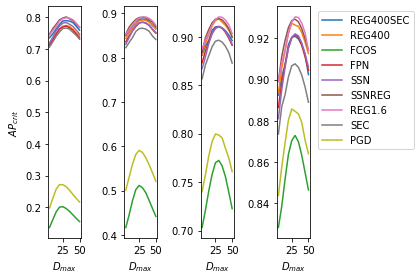

In [262]:
%matplotlib inline
D=[5,10,15,20,25,30,35,40,45,50]
I=[25]
T=[6]
sort_by="MAX_DISTANCE_OBJ"
x_label='$D_{max}$'

plt.subplot(1, 4, 1)
plt.xlabel(x_label)
plt.ylabel('$AP_{crit}$');

dataset=df_05
for y in y_tot:
    a=dataset
    a=a.loc[a["MAX_TIME_INTERSECT"].isin(T)]
    a=a.loc[a["MAX_DISTANCE_INTERSECT"].isin(I)]
    a=a.loc[(a["MAX_DISTANCE_OBJ"].isin(D))]# & (a["MAX_DISTANCE_OBJ"]<=30)]
    a=a.loc[a["Model"]==y]
    a=a[["MAX_DISTANCE_OBJ","MAX_DISTANCE_INTERSECT","MAX_TIME_INTERSECT", "ap_crit"]]
    a=a.sort_values(by=sort_by)
    plot_data=a.to_numpy().T
    
    plt.plot(plot_data[0], plot_data[3], label=y);

plt.subplot(1, 4, 2)
plt.xlabel(x_label)
#plt.ylabel('$AP_{crit}$');

dataset=df_1
for y in y_tot:
    a=dataset
    a=a.loc[a["MAX_TIME_INTERSECT"].isin(T)]
    a=a.loc[a["MAX_DISTANCE_INTERSECT"].isin(I)]
    a=a.loc[(a["MAX_DISTANCE_OBJ"].isin(D))]# & (a["MAX_DISTANCE_OBJ"]<=30)]
    a=a.loc[a["Model"]==y]
    a=a[["MAX_DISTANCE_OBJ","MAX_DISTANCE_INTERSECT","MAX_TIME_INTERSECT", "ap_crit"]]
    a=a.sort_values(by=sort_by)
    plot_data=a.to_numpy().T
    plt.plot(plot_data[0], plot_data[3], label=y);
    
plt.subplot(1, 4, 3)
plt.xlabel(x_label)
#plt.ylabel('$AP_{crit}$');

dataset=df_2
for y in y_tot:
    a=dataset
    a=a.loc[a["MAX_TIME_INTERSECT"].isin(T)]
    a=a.loc[a["MAX_DISTANCE_INTERSECT"].isin(I)]
    a=a.loc[(a["MAX_DISTANCE_OBJ"].isin(D))]# & (a["MAX_DISTANCE_OBJ"]<=30)]
    a=a.loc[a["Model"]==y]
    a=a[["MAX_DISTANCE_OBJ","MAX_DISTANCE_INTERSECT","MAX_TIME_INTERSECT", "ap_crit"]]
    a=a.sort_values(by=sort_by)
    plot_data=a.to_numpy().T
    plt.plot(plot_data[0], plot_data[3], label=y);


plt.subplot(1, 4, 4)
plt.xlabel(x_label)
#plt.ylabel('$AP_{crit}$');

dataset=df_4
for y in y_tot:
    lab=ylabel[y_tot.index(y)]
    a=dataset
    a=a.loc[a["MAX_TIME_INTERSECT"].isin(T)]
    a=a.loc[a["MAX_DISTANCE_INTERSECT"].isin(I)]
    a=a.loc[(a["MAX_DISTANCE_OBJ"].isin(D))]# & (a["MAX_DISTANCE_OBJ"]<=30)]
    a=a.loc[a["Model"]==y]
    a=a[["MAX_DISTANCE_OBJ","MAX_DISTANCE_INTERSECT","MAX_TIME_INTERSECT", "ap_crit"]]
    a=a.sort_values(by=sort_by)
    plot_data=a.to_numpy().T
    plt.plot(plot_data[0], plot_data[3], label=lab);
    
plt.legend(bbox_to_anchor=(1.1, 1.00))

plt.show()

We set D, T and we plot I

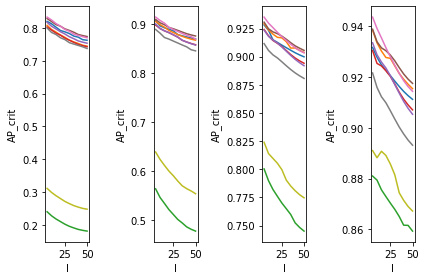

In [263]:
%matplotlib inline
D=[25]
I=[5,10,15,20,25,30,35,40,45,50]
T=[6]
sort_by="MAX_DISTANCE_INTERSECT"
x_label='I'

plt.subplot(1, 4, 1)
plt.xlabel(x_label)
plt.ylabel('AP_crit');

dataset=df_05
for y in y_tot:
    a=dataset
    a=a.loc[a["MAX_TIME_INTERSECT"].isin(T)]
    a=a.loc[a["MAX_DISTANCE_INTERSECT"].isin(I)]
    a=a.loc[(a["MAX_DISTANCE_OBJ"].isin(D))]# & (a["MAX_DISTANCE_OBJ"]<=30)]
    a=a.loc[a["Model"]==y]
    a=a[["MAX_DISTANCE_OBJ","MAX_DISTANCE_INTERSECT","MAX_TIME_INTERSECT", "ap_crit"]]
    a=a.sort_values(by=sort_by)
    plot_data=a.to_numpy().T
    
    plt.plot(plot_data[1], plot_data[3], label=y);

plt.subplot(1, 4, 2)
plt.xlabel(x_label)
plt.ylabel('AP_crit');

dataset=df_1
for y in y_tot:
    a=dataset
    a=a.loc[a["MAX_TIME_INTERSECT"].isin(T)]
    a=a.loc[a["MAX_DISTANCE_INTERSECT"].isin(I)]
    a=a.loc[(a["MAX_DISTANCE_OBJ"].isin(D))]# & (a["MAX_DISTANCE_OBJ"]<=30)]
    a=a.loc[a["Model"]==y]
    a=a[["MAX_DISTANCE_OBJ","MAX_DISTANCE_INTERSECT","MAX_TIME_INTERSECT", "ap_crit"]]
    a=a.sort_values(by=sort_by)
    plot_data=a.to_numpy().T
    plt.plot(plot_data[1], plot_data[3], label=y);
    
plt.subplot(1, 4, 3)
plt.xlabel(x_label)
plt.ylabel('AP_crit');

dataset=df_2
for y in y_tot:
    a=dataset
    a=a.loc[a["MAX_TIME_INTERSECT"].isin(T)]
    a=a.loc[a["MAX_DISTANCE_INTERSECT"].isin(I)]
    a=a.loc[(a["MAX_DISTANCE_OBJ"].isin(D))]# & (a["MAX_DISTANCE_OBJ"]<=30)]
    a=a.loc[a["Model"]==y]
    a=a[["MAX_DISTANCE_OBJ","MAX_DISTANCE_INTERSECT","MAX_TIME_INTERSECT", "ap_crit"]]
    a=a.sort_values(by=sort_by)
    plot_data=a.to_numpy().T
    plt.plot(plot_data[1], plot_data[3], label=y);
#plt.legend()

plt.subplot(1, 4, 4)
plt.xlabel(x_label)
plt.ylabel('AP_crit');

dataset=df_4
for y in y_tot:
    a=dataset
    a=a.loc[a["MAX_TIME_INTERSECT"].isin(T)]
    a=a.loc[a["MAX_DISTANCE_INTERSECT"].isin(I)]
    a=a.loc[(a["MAX_DISTANCE_OBJ"].isin(D))]# & (a["MAX_DISTANCE_OBJ"]<=30)]
    a=a.loc[a["Model"]==y]
    a=a[["MAX_DISTANCE_OBJ","MAX_DISTANCE_INTERSECT","MAX_TIME_INTERSECT", "ap_crit"]]
    a=a.sort_values(by=sort_by)
    plot_data=a.to_numpy().T
    plt.plot(plot_data[1], plot_data[3], label=y);
#plt.legend()
plt.show()

To better discuss the contribution of Pcrit and Rcrit, we plot them in the same way of a precision-recall curve. This is the plot of the  Pcrit at different Rcrit levels, or, in other words, we plot the points (Pcrit, Rcrit) at varying detection thresholds. We compare them with the usual precision-recall curve. 

Clearly, for each of the 1500 combinations and each of the dist_th=[0.05, 1, 2, 4], a Pcrit-Rcrit curve is computed. For brevity, we report a representative sample. The trends are similar for the others detectors, and it corresponds to the usual trends of a precision-recall curve.

In [264]:
import json

In [265]:
path = "./results_EXTENDED/"

In [266]:
y0='pointpillars-secfpn'
y1='regnet-regnetX_400MF-SECFPN'
y2='regnet-regnetX_400MF-FPN'
y3='FCOSD-RESNET101'
y4='pointpillars-fpn'
y5='ssn-SECFPN'
y6='ssn-REGNET'
y7='regnet-regnetX_FPN'
y8='pgd'

y_tot=[y0, y1, y2, y3, y4, y5, y6, y7, y8]
dist=['car:0.5', 'car:1.0','car:2.0','car:4.0']
data=[]#data0 contiene y0, data1 contiene y1, etc

for y in y_tot:
    text_files = glob.glob(path + "/"+y+"/DATA/**/metrics_details.json", recursive = False)
    data.append(text_files)

In [267]:
VARIOUS_DISTANCE_OBJ_ARRAY=[]
VARIOUS_DISTANCE_OBJ_ARRAY.extend(range(5, 51, 5))
VARIOUS_DISTANCE_INTERSECT_ARRAY=[]
VARIOUS_DISTANCE_INTERSECT_ARRAY.extend(range(5, 51, 5))
VARIOUS_TIME_INTERSECT_ARRAY=[]
VARIOUS_TIME_INTERSECT_ARRAY.extend(range(2,31,2))

import itertools
a = [VARIOUS_DISTANCE_OBJ_ARRAY,VARIOUS_DISTANCE_INTERSECT_ARRAY,VARIOUS_TIME_INTERSECT_ARRAY]
combined_list=list(itertools.product(*a))
combined_list=np.asarray(combined_list)

In [268]:
dist_label=['d=0.5', 'd=1.0', 'd=2.0', 'd=4.0']

In [269]:
#plt.legend(bbox_to_anchor=(1.1, 1.00))

./results_EXTENDED//pointpillars-secfpn/PRED AL NUMERATORE/iteration_472/metrics_details.json


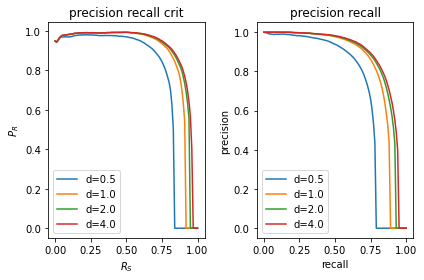

In [270]:
d=data[0][60] #just a sample D, I, T
#0 is pointpillars
# ---> y0='pointpillars-secfpn'
#60 is the folder number 60, you could see the readme in the folder to see details of the configuration

f = open(d,)
print(d)

jsonfiles=json.load(f)
f.close()

for i in dist:
    jsonfiles[i]['recall_crit']
    jsonfiles[i]['precision_crit']
#precision-recall curve
plt.figure()
plt.subplot(1,2,1)
for i in dist:
    a=jsonfiles[i]['recall_crit']
    a=np.asarray(a, dtype='float')
    b=jsonfiles[i]['precision_crit']
    b=np.asarray(b, dtype='float')
    plt.plot(a,b, label=dist_label[dist.index(i)] )

plt.legend()
plt.title("precision recall crit")
plt.xlabel('$R_S$')
plt.ylabel('$P_R$')

plt.subplot(1,2,2)
for i in dist:
    a=jsonfiles[i]['recall']
    a=np.asarray(a, dtype='float')
    b=jsonfiles[i]['precision']
    b=np.asarray(b, dtype='float')
    plt.plot(a,b, label=dist_label[dist.index(i)]  )

plt.legend()
plt.title("precision recall")
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

./results_EXTENDED//pointpillars-secfpn/PRED AL NUMERATORE/iteration_1383/metrics_details.json


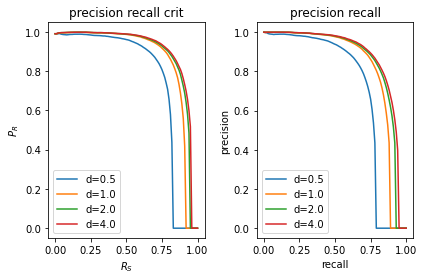

In [271]:
d=data[0][1480] #ne ho preso 1 a caso

f = open(d,) #mah, non so quale far vedere, ne ho preso 1 a caso.
                      #le curve prec-rec fanno 1 po' tutte cosi per definizione, 
                      #se non ci sono errori
print(d)

jsonfiles=json.load(f)
f.close()

for i in dist:
    jsonfiles[i]['recall_crit']
    jsonfiles[i]['precision_crit']
#precision-recall curve
plt.figure()
plt.subplot(1,2,1)
for i in dist:
    a=jsonfiles[i]['recall_crit']
    a=np.asarray(a, dtype='float')
    b=jsonfiles[i]['precision_crit']
    b=np.asarray(b, dtype='float')
    plt.plot(a,b, label=dist_label[dist.index(i)] )

plt.legend()
plt.title("precision recall crit")
plt.xlabel('$R_S$')
plt.ylabel('$P_R$')

plt.subplot(1,2,2)
for i in dist:
    a=jsonfiles[i]['recall']
    a=np.asarray(a, dtype='float')
    b=jsonfiles[i]['precision']
    b=np.asarray(b, dtype='float')
    plt.plot(a,b, label=dist_label[dist.index(i)]  )

plt.legend()
plt.title("precision recall")
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

./results_EXTENDED//regnet-regnetX_FPN/PRED AL NUMERATORE/iteration_1369/metrics_details.json
./results_EXTENDED//regnet-regnetX_FPN/PRED AL NUMERATORE/iteration_27/metrics_details.json
./results_EXTENDED//regnet-regnetX_FPN/PRED AL NUMERATORE/iteration_937/metrics_details.json


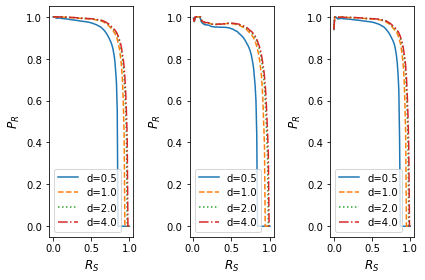

In [272]:
d=data[7][166] 
d1=data[7][333] 
d2=data[7][665] 


f = open(d,) 

print(d)
jsonfiles=json.load(f)
f.close()

plt.figure()
plt.subplot(1,3,1)

i=dist[0]
jsonfiles[i]['recall_crit']
jsonfiles[i]['precision_crit']
#precision-recall curve
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b, label=dist_label[dist.index(i)] )

i=dist[1]
jsonfiles[i]['recall_crit']
jsonfiles[i]['precision_crit']
#precision-recall curve
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b, '--', label=dist_label[dist.index(i)] )

i=dist[2]
jsonfiles[i]['recall_crit']
jsonfiles[i]['precision_crit']
#precision-recall curve
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b,':', label=dist_label[dist.index(i)] )

i=dist[3]
jsonfiles[i]['recall_crit']
jsonfiles[i]['precision_crit']
#precision-recall curve
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b, '-.', label=dist_label[dist.index(i)] )

plt.legend(loc='lower left')
#plt.title("precision recall crit")
plt.xlabel('$R_S$',fontsize=12)
plt.ylabel('$P_R$',fontsize=12)
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, 1.50, step=0.5))


f = open(d1,) 
print(d1)
jsonfiles=json.load(f)
f.close()


plt.subplot(1,3,2)
i=dist[0]
jsonfiles[i]['recall_crit']
jsonfiles[i]['precision_crit']
#precision-recall curve
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b, label=dist_label[dist.index(i)] )

i=dist[1]
jsonfiles[i]['recall_crit']
jsonfiles[i]['precision_crit']
#precision-recall curve
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b, '--', label=dist_label[dist.index(i)] )

i=dist[2]
jsonfiles[i]['recall_crit']
jsonfiles[i]['precision_crit']
#precision-recall curve
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b,':', label=dist_label[dist.index(i)] )

i=dist[3]
jsonfiles[i]['recall_crit']
jsonfiles[i]['precision_crit']
#precision-recall curve
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')

plt.plot(a,b, '-.', label=dist_label[dist.index(i)] )
plt.legend(loc='lower left')
plt.xlabel('$R_S$',fontsize=12)
plt.ylabel('$P_R$',fontsize=12)
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, 1.50, step=0.5))



f = open(d2,) 
print(d2)
jsonfiles=json.load(f)
f.close()


plt.subplot(1,3,3)
i=dist[0]
jsonfiles[i]['recall_crit']
jsonfiles[i]['precision_crit']
#precision-recall curve
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b, label=dist_label[dist.index(i)] )

i=dist[1]
jsonfiles[i]['recall_crit']
jsonfiles[i]['precision_crit']
#precision-recall curve
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b, '--', label=dist_label[dist.index(i)] )


i=dist[2]
jsonfiles[i]['recall_crit']
jsonfiles[i]['precision_crit']
#precision-recall curve
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b,':', label=dist_label[dist.index(i)] )

i=dist[3]
jsonfiles[i]['recall_crit']
jsonfiles[i]['precision_crit']
#precision-recall curve
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b, '-.', label=dist_label[dist.index(i)] )

plt.legend(loc='lower left')
#plt.title("precision recall crit")
plt.xlabel('$R_S$',fontsize=12)
plt.ylabel('$P_R$',fontsize=12)

locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, 1.50, step=0.5))
plt.show()

In [273]:
VARIOUS_DISTANCE_OBJ_ARRAY=[]
VARIOUS_DISTANCE_OBJ_ARRAY.extend(range(5, 51, 5))
VARIOUS_DISTANCE_INTERSECT_ARRAY=[]
VARIOUS_DISTANCE_INTERSECT_ARRAY.extend(range(5, 51, 5))
VARIOUS_TIME_INTERSECT_ARRAY=[]
VARIOUS_TIME_INTERSECT_ARRAY.extend(range(2,31,2))

import itertools
listoneCombinazioni = [VARIOUS_DISTANCE_OBJ_ARRAY,VARIOUS_DISTANCE_INTERSECT_ARRAY,VARIOUS_TIME_INTERSECT_ARRAY]
combined_list=list(itertools.product(*listoneCombinazioni))

In [274]:
#per prendere l'indice di: [D,R,T]
indici=(20,15,6)
i=dist[0]

A=combined_list.index(indici)
d=data[0][A]
d1=data[1][A]
d2=data[2][A]
d3=data[3][A]
d4=data[4][A]
d5=data[5][A]
d6=data[6][A]
d7=data[7][A]
d8=data[8][A]


y0A='SEC'
y1B='REG400SEC'
y2C='REG400'
y3D='FCOS'
y4E='FPN'
y5F='SECFPN'
y6G='SSNREG'
y7H='REG1.6'
y8I='PGD'

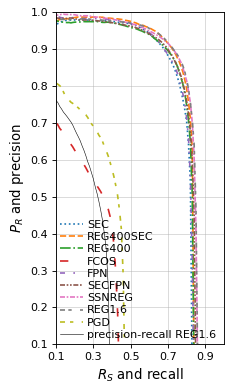

In [275]:
plt.figure(figsize=(3, 5), dpi=80)

f = open(d,)
jsonfiles=json.load(f)
f.close()
#precision-recall curve
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b, linestyle='dotted', label=y0A )

f = open(d1,)
jsonfiles=json.load(f)
f.close()
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b, linestyle='dashed', label=y1B)

f = open(d2,)
jsonfiles=json.load(f)
f.close()
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b, linestyle='dashdot', label=y2C)

f = open(d3,)
jsonfiles=json.load(f)
f.close()
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b,linestyle=(0, (5, 10)), label=y3D)

f = open(d4,)
jsonfiles=json.load(f)
f.close()
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b,linestyle=(0, (3, 5, 1, 5)), label=y4E)

f = open(d5,)
jsonfiles=json.load(f)
f.close()
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b,linestyle=(0, (3, 1, 1, 1, 1, 1)), label=y5F)

f = open(d6,)
jsonfiles=json.load(f)
f.close()
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b,linestyle=(0, (3, 1, 1, 1)), label=y6G)


f = open(d7,)
jsonfiles=json.load(f)
f.close()
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b,linestyle=(0, (3, 2, 2, 5)), label=y7H)

f = open(d8,)
jsonfiles=json.load(f)
f.close()
a=jsonfiles[i]['recall_crit']
a=np.asarray(a, dtype='float')
b=jsonfiles[i]['precision_crit']
b=np.asarray(b, dtype='float')
plt.plot(a,b,linestyle=(0, (3, 3, 2, 5)), label=y8I)


c=jsonfiles[i]['recall']
c=np.asarray(c, dtype='float')
g=jsonfiles[i]['precision']
g=np.asarray(g, dtype='float')
plt.plot(c,g, label="precision-recall REG1.6", lw=0.5, c='k' )


ax = plt.gca()
ax.set_xlim([0.1, 1])
ax.set_ylim([0.1, 1])


#plt.title("all detectors, d="+str(i)+",  ["+str(indici)+"]")
plt.legend(loc='lower left',  framealpha=0, borderpad=0.2, labelspacing=0.2, 
           borderaxespad=0.2,handletextpad=0.4)
plt.xlabel('$R_S$ and recall',fontsize=12)
plt.ylabel('$P_R$ and precision',fontsize=12)
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0.1, 1.01, step=0.2))
plt.yticks(np.arange(0.1, 1.01, step=0.1))
plt.grid(True,alpha=0.5)
plt.savefig('paper-images/pr-curve-05.svg')
plt.show()

We try with a 3D visualization. Somehow it looks as expected. Curves are all similar, but some "white" parts are shown between the curves; this indicates that there are breaks in the mantles.

However, there is little of novelty to add here. The relevant information are already provided with samples of precision-recall crit curves, for the different object detectors and $dist_{th}$. This is just a large-scale confirmation.

In [276]:
#y0='pointpillars-secfpn'
#y1='regnet-regnetX_400MF-SECFPN'
#y2='regnet-regnetX_400MF-FPN'
#y3='FCOSD-RESNET101'
#y4='pointpillars-fpn'
#y5='ssn-SECFPN'
#y6='ssn-REGNET'
#y7='regnet-regnetX_FPN'
#dist=['car:0.5', 'car:1.0','car:2.0','car:4.0']

y=y6#which detector I want to explore
distChosen=dist[3] #which dist_th I want to choose
data1=sorted(data[y_tot.index(y)]) #pointpillars-secfpn 1500 samples

In [277]:
a=np.zeros([1500, 101], dtype=float)
b=np.zeros([1500, 101], dtype=float)

for i in range(1500):
    f = open(data1[i],)
    jsonfiles=json.load(f)
    a[i]=jsonfiles[distChosen]['recall_crit']
    b[i]=jsonfiles[distChosen]['precision_crit']   
    f.close()

#orribile ma funziona
c=np.zeros([1500, 101], dtype=int)
for i in range(1500):
    c[i]=i

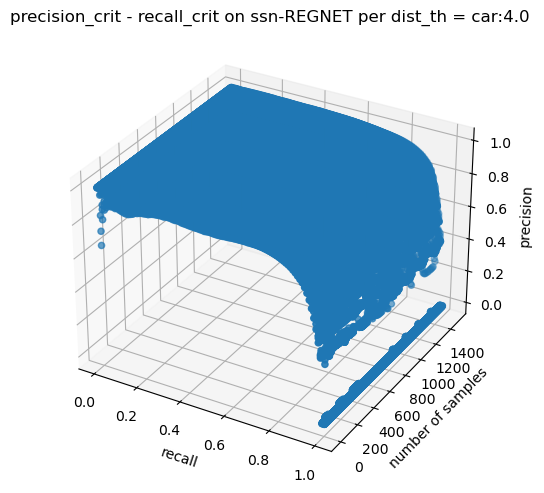

In [278]:
%matplotlib inline
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = plt.axes(projection='3d')
ax.set_title('precision_crit - recall_crit on '+str(y)+' per dist_th = '+str(distChosen));

ax.set_xlabel('recall')
ax.set_ylabel('number of samples')
ax.set_zlabel('precision');

ax.scatter3D(a,c,b, cmap='Grey');
plt.show()

Then we try to understand the precision at given recall level (and viceversa), both for the crit version and the normal one. This way we can understand how precision evolves at given recall level, which means in our case the precision criticality that we have at specific (safety-related) recall criticalities.

We believe this is particularly important, because it allows answering the question: "given a safety target with specific D, I, T, what is the possibility of driving the car with good mission reliability (i.e., without being forced to stop continuously for whatever false positive)?". For example, the safest condition is recall_crit=1, but precision_crit is 0 in such cases. However, a very high recall_crit is indeed necessary. Some possible recall_crit are shown below, with varying I, D, T, to give examples. It can be seen that, while it is true that none of the object detector is satisfying for safety purposes, our approach offers a method to rate object detectors based on criticality and expectations on safety.

In [279]:
y0='pointpillars-secfpn'
y1='regnet-regnetX_400MF-SECFPN'
y2='regnet-regnetX_400MF-FPN'
y3='FCOSD-RESNET101'
y4='pointpillars-fpn'
y5='ssn-SECFPN'
y6='ssn-REGNET'
y7='regnet-regnetX_FPN'
y8='pgd'

y_tot=[y0, y1, y2, y3, y4, y5, y6, y7, y8]
dist=['car:0.5', 'car:1.0','car:2.0','car:4.0']
data=[]#data0 contiene y0, data1 contiene y1, etc

for y in y_tot:
    text_files = glob.glob(path + "/"+y+"/DATA/**/metrics_details.json", recursive = False)
    data.append(text_files)

We fix recall to different values (high values, as we are naturally interested in safety) and we plot precision, for a given object detector and $dist_{th}$. We try to block the values of D, I, T depending on the circumstances. This is needed to work with a reasonable number of dimension, otherwise we would need 4D or 5D plots which would become rather clumsy to see.

We try different settings. We plot all $dist_{th}$ for an object detector. We also plot the original precision (i.e., the precision for the corresponding recall). This shows how the precision changes with the adoption of the recall_crit method. We can easily observe that for high recall (recall=0.9 and recall=0.95), precision_crit is very bad (until it matches the precision, especially for low dist_th) , but our model with precision_crit allows introducing "decent" precisions at least under some settings. This is very useful as it can allow establishing that we can guide safety with good reliability under determined assumptions (on detectable conditions).

Note that, however, with recall=0.95 the precision_crit is satisfying only in very limited conditions (precision_crit becomes equal to precision). This means also that object detectors should be improved, but it is well-known that object detection is still far from perfect.

In [396]:
y=y6
dist_selected=dist[0]
recall_crit=0.9

In [397]:
data1=sorted(data[y_tot.index(y)]) #1500 samples

In [398]:
alpha=np.zeros([1500, 6], dtype=float)  #alpha is structure as:
                                        #0: MAX_DISTANCE_OBJ
                                        #1: MAX_DISTANCE_INTERSECT
                                        #2: MAX_TIME_INTERSECT
                                        #3: rec_crit
                                        #4: prec_crit
                                        #5: prec
found="9999" #default

for i in range(0,1500):
    f = open(data1[i],)
    jsonfiles=json.load(f)
    m = re.search('iteration_(.+?)/', data1[i])
    if m:
        found = m.group(1)
        f1 = open(path + "/"+y+"/DATA/iteration_"+found+"/README_CONFIG.txt",'r')
        for line in f1:
            fields = line.strip().split()
            if(fields[0]=='MAX_DISTANCE_OBJ'):
                alpha[i][0]=int(fields[1])
            if(fields[0]=='MAX_DISTANCE_INTERSECT'):
                alpha[i][1]=int(fields[1])
            if(fields[0]=='MAX_TIME_INTERSECT'):
                alpha[i][2]=int(fields[1])
        f1.close()

    a=jsonfiles[dist_selected]['recall_crit']
    a=np.around(a, decimals=2)
    b=jsonfiles[dist_selected]['precision_crit']
    c=jsonfiles[dist_selected]['precision'] 
    alpha[i][3]=recall_crit #default value
    alpha[i][4]=b[np.where(a ==recall_crit)[0][0]]
    alpha[i][5]=c[np.where(a ==recall_crit)[0][0]]
    f.close()

In [399]:
recall_crit=0.95

In [400]:
alpha=np.zeros([1500, 6], dtype=float)  #alpha is structure as:
                                        #0: MAX_DISTANCE_OBJ
                                        #1: MAX_DISTANCE_INTERSECT
                                        #2: MAX_TIME_INTERSECT
                                        #3: rec_crit
                                        #4: prec_crit
                                        #5: prec
found="9999" #default

for i in range(0,1500):
    f = open(data1[i],)
    jsonfiles=json.load(f)
    m = re.search('iteration_(.+?)/', data1[i])
    if m:
        found = m.group(1)
        f1 = open(path + "/"+y+"/DATA/iteration_"+found+"/README_CONFIG.txt",'r')
        for line in f1:
            fields = line.strip().split()
            if(fields[0]=='MAX_DISTANCE_OBJ'):
                alpha[i][0]=int(fields[1])
            if(fields[0]=='MAX_DISTANCE_INTERSECT'):
                alpha[i][1]=int(fields[1])
            if(fields[0]=='MAX_TIME_INTERSECT'):
                alpha[i][2]=int(fields[1])
        f1.close()

    a=jsonfiles[dist_selected]['recall_crit']
    a=np.around(a, decimals=2)
    b=jsonfiles[dist_selected]['precision_crit']
    c=jsonfiles[dist_selected]['precision'] 
    alpha[i][3]=recall_crit #default value
    alpha[i][4]=b[np.where(a ==recall_crit)[0][0]]
    alpha[i][5]=c[np.where(a ==recall_crit)[0][0]]
    f.close()

In [401]:
y=y6
dist_selected=dist[2]
recall_crit=0.9

In [402]:
data1=sorted(data[y_tot.index(y)]) #1500 samples

In [403]:
alpha=np.zeros([1500, 6], dtype=float)  #alpha is structure as:
                                        #0: MAX_DISTANCE_OBJ
                                        #1: MAX_DISTANCE_INTERSECT
                                        #2: MAX_TIME_INTERSECT
                                        #3: rec_crit
                                        #4: prec_crit
                                        #5: prec
found="9999" #default

for i in range(0,1500):
    f = open(data1[i],)
    jsonfiles=json.load(f)
    m = re.search('iteration_(.+?)/', data1[i])
    if m:
        found = m.group(1)
        f1 = open(path + "/"+y+"/DATA/iteration_"+found+"/README_CONFIG.txt",'r')
        for line in f1:
            fields = line.strip().split()
            if(fields[0]=='MAX_DISTANCE_OBJ'):
                alpha[i][0]=int(fields[1])
            if(fields[0]=='MAX_DISTANCE_INTERSECT'):
                alpha[i][1]=int(fields[1])
            if(fields[0]=='MAX_TIME_INTERSECT'):
                alpha[i][2]=int(fields[1])
        f1.close()

    a=jsonfiles[dist_selected]['recall_crit']
    a=np.around(a, decimals=2)
    b=jsonfiles[dist_selected]['precision_crit']
    c=jsonfiles[dist_selected]['precision'] 
    alpha[i][3]=recall_crit #default value
    alpha[i][4]=b[np.where(a ==recall_crit)[0][0]]
    alpha[i][5]=c[np.where(a ==recall_crit)[0][0]]
    f.close()

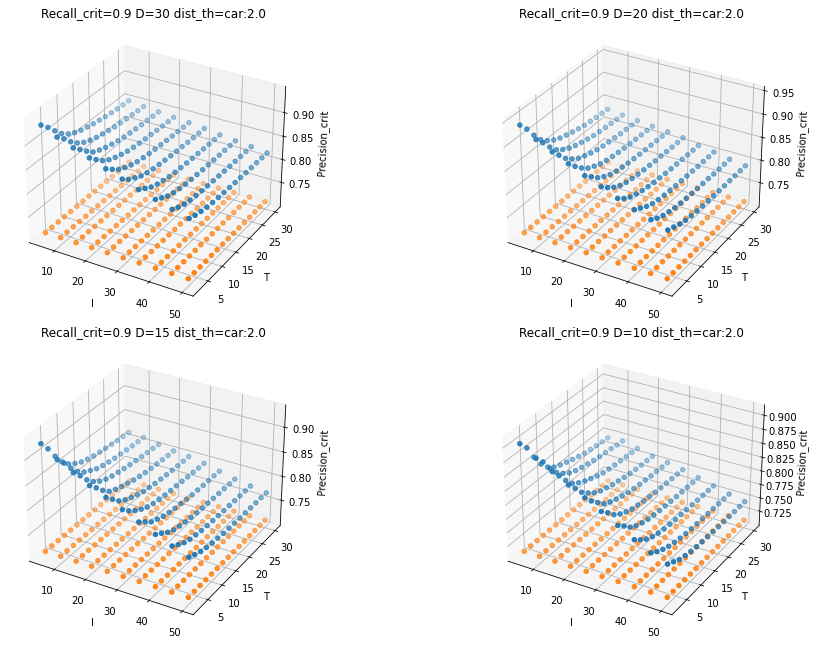

In [404]:
%matplotlib inline
fig=plt.figure()

fig.set_size_inches(16, 9)
############################################
ax = fig.add_subplot(2, 2, 1, projection='3d')
D=30
ax.set_title('Recall_crit='+ str(recall_crit)+' D='+str(D)+' dist_th='+dist_selected);
mask = alpha[:, 0] == D
alpha1=alpha[mask, :]

ax.set_xlabel('I')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision
############################################
ax = fig.add_subplot(2, 2, 2, projection='3d')
D=20
ax.set_title('Recall_crit='+ str(recall_crit)+' D='+str(D)+' dist_th='+dist_selected);

mask = alpha[:, 0] == D
alpha1=alpha[mask, :]

ax.set_xlabel('I')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);
ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');
###########################
ax = fig.add_subplot(2, 2, 3, projection='3d')
D=15
ax.set_title('Recall_crit='+ str(recall_crit)+' D='+str(D)+' dist_th='+dist_selected);

mask = alpha[:, 0] == D
alpha1=alpha[mask, :]

ax.set_xlabel('I')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);
ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');

###########################
ax = fig.add_subplot(2, 2, 4, projection='3d')
D=10
ax.set_title('Recall_crit='+ str(recall_crit)+' D='+str(D)+' dist_th='+dist_selected);

mask = alpha[:, 0] == D
alpha1=alpha[mask, :]

ax.set_xlabel('I')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);
ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');
plt.show()

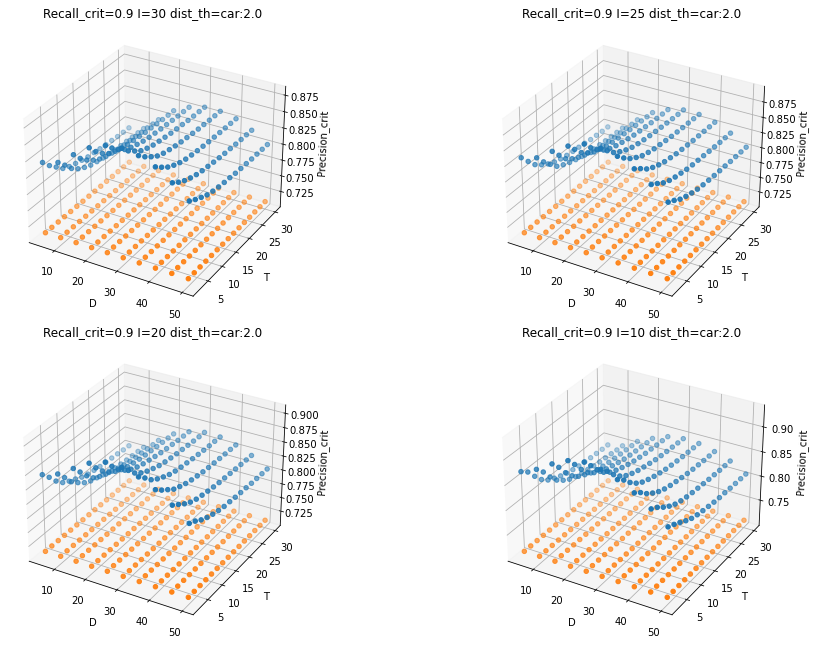

In [405]:
%matplotlib inline
fig=plt.figure()

fig.set_size_inches(16, 9)
############################################
ax = fig.add_subplot(2, 2, 1, projection='3d')
I=30
ax.set_title('Recall_crit='+ str(recall_crit)+' I='+str(I)+' dist_th='+dist_selected);
mask = alpha[:, 1] == I
alpha1=alpha[mask, :]

ax.set_xlabel('D')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision
############################################
ax = fig.add_subplot(2, 2, 2, projection='3d')
I=25
ax.set_title('Recall_crit='+ str(recall_crit)+' I='+str(I)+' dist_th='+dist_selected);
mask = alpha[:, 1] == I
alpha1=alpha[mask, :]

ax.set_xlabel('D')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision
###########################
ax = fig.add_subplot(2, 2, 3, projection='3d')
I=20
ax.set_title('Recall_crit='+ str(recall_crit)+' I='+str(I)+' dist_th='+dist_selected);
mask = alpha[:, 1] == I
alpha1=alpha[mask, :]

ax.set_xlabel('D')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision

###########################
ax = fig.add_subplot(2, 2, 4, projection='3d')
I=10
ax.set_title('Recall_crit='+ str(recall_crit)+' I='+str(I)+' dist_th='+dist_selected);
mask = alpha[:, 1] == I
alpha1=alpha[mask, :]

ax.set_xlabel('D')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision

plt.show()

In [406]:
recall_crit=0.95

In [407]:
alpha=np.zeros([1500, 6], dtype=float)  #alpha is structure as:
                                        #0: MAX_DISTANCE_OBJ
                                        #1: MAX_DISTANCE_INTERSECT
                                        #2: MAX_TIME_INTERSECT
                                        #3: rec_crit
                                        #4: prec_crit
                                        #5: prec
found="9999" #default

for i in range(0,1500):
    f = open(data1[i],)
    jsonfiles=json.load(f)
    m = re.search('iteration_(.+?)/', data1[i])
    if m:
        found = m.group(1)
        f1 = open(path + "/"+y+"/DATA/iteration_"+found+"/README_CONFIG.txt",'r')
        for line in f1:
            fields = line.strip().split()
            if(fields[0]=='MAX_DISTANCE_OBJ'):
                alpha[i][0]=int(fields[1])
            if(fields[0]=='MAX_DISTANCE_INTERSECT'):
                alpha[i][1]=int(fields[1])
            if(fields[0]=='MAX_TIME_INTERSECT'):
                alpha[i][2]=int(fields[1])
        f1.close()

    a=jsonfiles[dist_selected]['recall_crit']
    a=np.around(a, decimals=2)
    b=jsonfiles[dist_selected]['precision_crit']
    c=jsonfiles[dist_selected]['precision'] 
    alpha[i][3]=recall_crit #default value
    alpha[i][4]=b[np.where(a ==recall_crit)[0][0]]
    alpha[i][5]=c[np.where(a ==recall_crit)[0][0]]
    f.close()

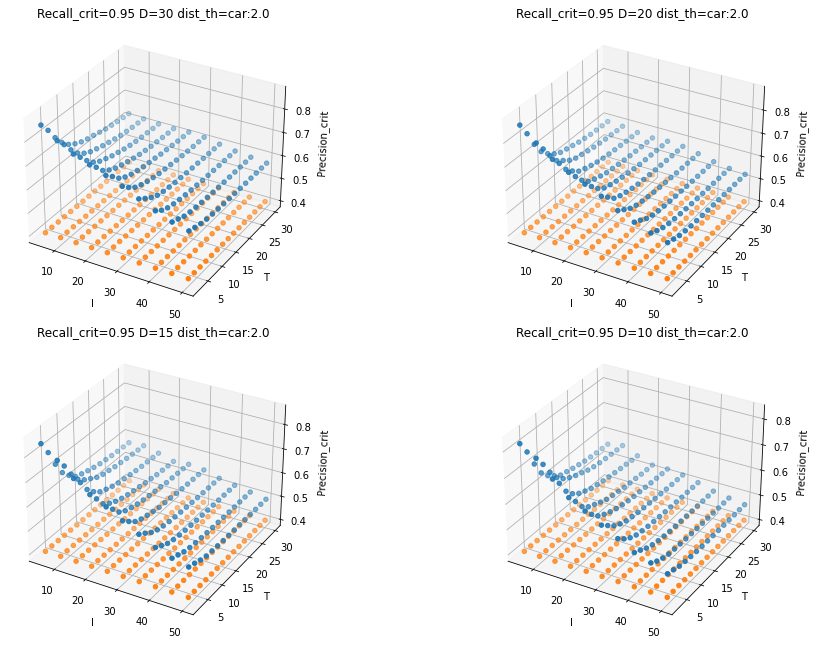

In [408]:
%matplotlib inline
fig=plt.figure()

fig.set_size_inches(16, 9)
############################################
ax = fig.add_subplot(2, 2, 1, projection='3d')
D=30
ax.set_title('Recall_crit='+ str(recall_crit)+' D='+str(D)+' dist_th='+dist_selected);
mask = alpha[:, 0] == D
alpha1=alpha[mask, :]

ax.set_xlabel('I')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision
############################################
ax = fig.add_subplot(2, 2, 2, projection='3d')
D=20
ax.set_title('Recall_crit='+ str(recall_crit)+' D='+str(D)+' dist_th='+dist_selected);

mask = alpha[:, 0] == D
alpha1=alpha[mask, :]

ax.set_xlabel('I')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);
ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');
###########################
ax = fig.add_subplot(2, 2, 3, projection='3d')
D=15
ax.set_title('Recall_crit='+ str(recall_crit)+' D='+str(D)+' dist_th='+dist_selected);

mask = alpha[:, 0] == D
alpha1=alpha[mask, :]

ax.set_xlabel('I')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);
ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');

###########################
ax = fig.add_subplot(2, 2, 4, projection='3d')
D=10
ax.set_title('Recall_crit='+ str(recall_crit)+' D='+str(D)+' dist_th='+dist_selected);

mask = alpha[:, 0] == D
alpha1=alpha[mask, :]

ax.set_xlabel('I')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);
ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');
plt.show()

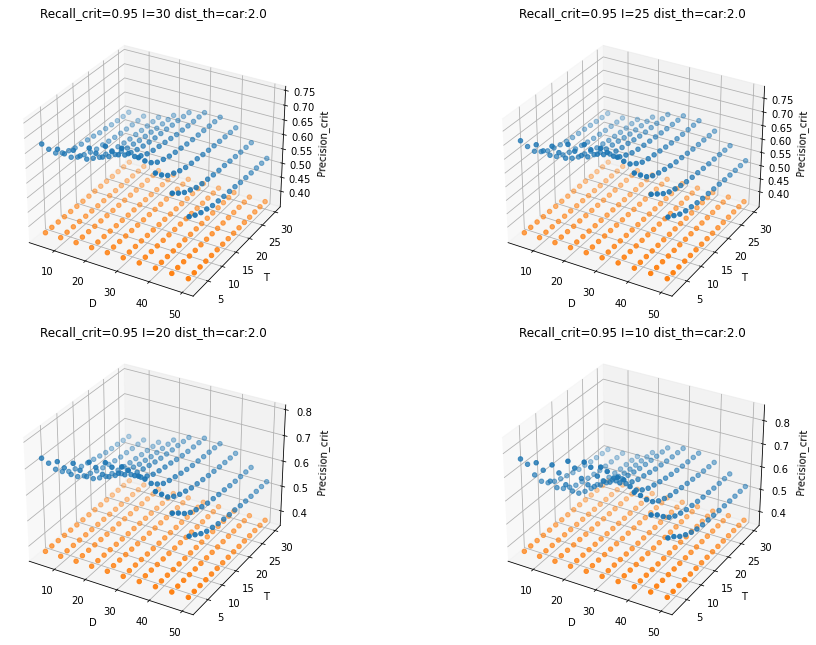

In [293]:
%matplotlib inline
fig=plt.figure()

fig.set_size_inches(16, 9)
############################################
ax = fig.add_subplot(2, 2, 1, projection='3d')
I=30
ax.set_title('Recall_crit='+ str(recall_crit)+' I='+str(I)+' dist_th='+dist_selected);
mask = alpha[:, 1] == I
alpha1=alpha[mask, :]

ax.set_xlabel('D')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision
############################################
ax = fig.add_subplot(2, 2, 2, projection='3d')
I=25
ax.set_title('Recall_crit='+ str(recall_crit)+' I='+str(I)+' dist_th='+dist_selected);
mask = alpha[:, 1] == I
alpha1=alpha[mask, :]

ax.set_xlabel('D')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision
###########################
ax = fig.add_subplot(2, 2, 3, projection='3d')
I=20
ax.set_title('Recall_crit='+ str(recall_crit)+' I='+str(I)+' dist_th='+dist_selected);
mask = alpha[:, 1] == I
alpha1=alpha[mask, :]

ax.set_xlabel('D')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision

###########################
ax = fig.add_subplot(2, 2, 4, projection='3d')
I=10
ax.set_title('Recall_crit='+ str(recall_crit)+' I='+str(I)+' dist_th='+dist_selected);
mask = alpha[:, 1] == I
alpha1=alpha[mask, :]

ax.set_xlabel('D')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision

plt.show()

In [294]:
y=y6
dist_selected=dist[3]
recall_crit=0.9

In [295]:
data1=sorted(data[y_tot.index(y)]) #1500 samples

In [296]:
alpha=np.zeros([1500, 6], dtype=float)  #alpha is structure as:
                                        #0: MAX_DISTANCE_OBJ
                                        #1: MAX_DISTANCE_INTERSECT
                                        #2: MAX_TIME_INTERSECT
                                        #3: rec_crit
                                        #4: prec_crit
                                        #5: prec
found="9999" #default

for i in range(0,1500):
    f = open(data1[i],)
    jsonfiles=json.load(f)
    m = re.search('iteration_(.+?)/', data1[i])
    if m:
        found = m.group(1)
        f1 = open(path + "/"+y+"/DATA/iteration_"+found+"/README_CONFIG.txt",'r')
        for line in f1:
            fields = line.strip().split()
            if(fields[0]=='MAX_DISTANCE_OBJ'):
                alpha[i][0]=int(fields[1])
            if(fields[0]=='MAX_DISTANCE_INTERSECT'):
                alpha[i][1]=int(fields[1])
            if(fields[0]=='MAX_TIME_INTERSECT'):
                alpha[i][2]=int(fields[1])
        f1.close()

    a=jsonfiles[dist_selected]['recall_crit']
    a=np.around(a, decimals=2)
    b=jsonfiles[dist_selected]['precision_crit']
    c=jsonfiles[dist_selected]['precision'] 
    alpha[i][3]=recall_crit #default value
    alpha[i][4]=b[np.where(a ==recall_crit)[0][0]]
    alpha[i][5]=c[np.where(a ==recall_crit)[0][0]]
    f.close()

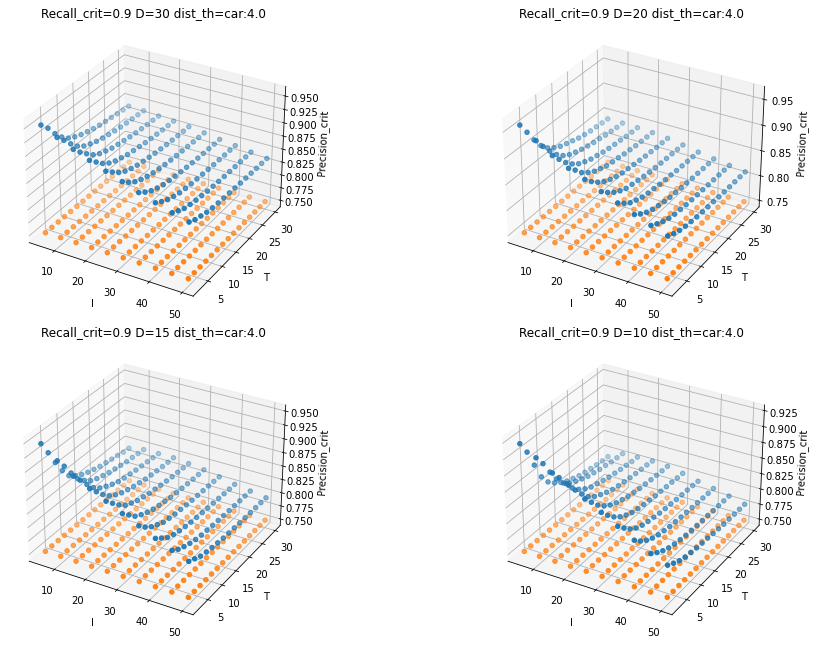

In [297]:
%matplotlib inline
fig=plt.figure()

fig.set_size_inches(16, 9)
############################################
ax = fig.add_subplot(2, 2, 1, projection='3d')
D=30
ax.set_title('Recall_crit='+ str(recall_crit)+' D='+str(D)+' dist_th='+dist_selected);
mask = alpha[:, 0] == D
alpha1=alpha[mask, :]

ax.set_xlabel('I')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision
############################################
ax = fig.add_subplot(2, 2, 2, projection='3d')
D=20
ax.set_title('Recall_crit='+ str(recall_crit)+' D='+str(D)+' dist_th='+dist_selected);

mask = alpha[:, 0] == D
alpha1=alpha[mask, :]

ax.set_xlabel('I')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);
ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');
###########################
ax = fig.add_subplot(2, 2, 3, projection='3d')
D=15
ax.set_title('Recall_crit='+ str(recall_crit)+' D='+str(D)+' dist_th='+dist_selected);

mask = alpha[:, 0] == D
alpha1=alpha[mask, :]

ax.set_xlabel('I')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);
ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');

###########################
ax = fig.add_subplot(2, 2, 4, projection='3d')
D=10
ax.set_title('Recall_crit='+ str(recall_crit)+' D='+str(D)+' dist_th='+dist_selected);

mask = alpha[:, 0] == D
alpha1=alpha[mask, :]

ax.set_xlabel('I')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);
ax.scatter3D(alpha1[:, 1].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');
plt.show()

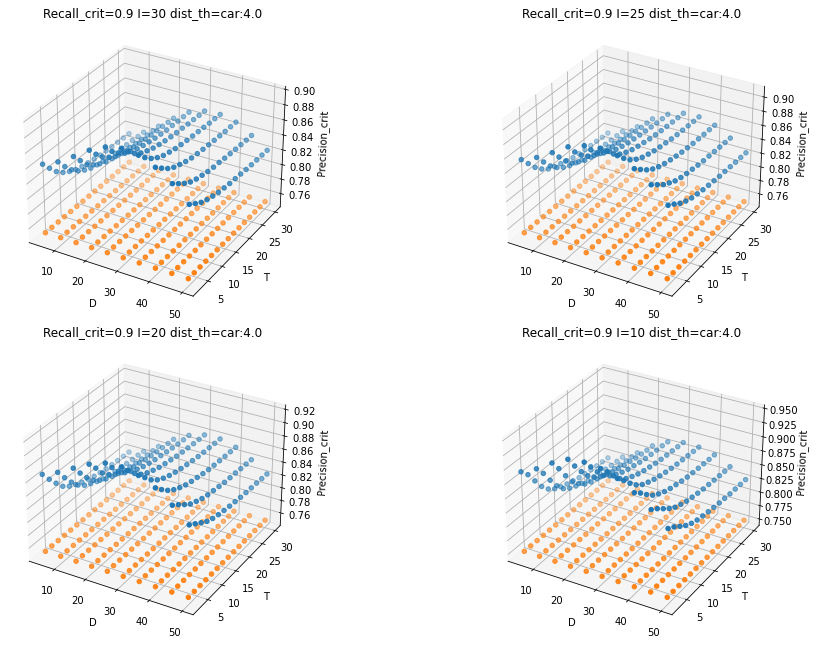

In [298]:
%matplotlib inline
fig=plt.figure()

fig.set_size_inches(16, 9)
############################################
ax = fig.add_subplot(2, 2, 1, projection='3d')
I=30
ax.set_title('Recall_crit='+ str(recall_crit)+' I='+str(I)+' dist_th='+dist_selected);
mask = alpha[:, 1] == I
alpha1=alpha[mask, :]

ax.set_xlabel('D')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision
############################################
ax = fig.add_subplot(2, 2, 2, projection='3d')
I=25
ax.set_title('Recall_crit='+ str(recall_crit)+' I='+str(I)+' dist_th='+dist_selected);
mask = alpha[:, 1] == I
alpha1=alpha[mask, :]

ax.set_xlabel('D')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision
###########################
ax = fig.add_subplot(2, 2, 3, projection='3d')
I=20
ax.set_title('Recall_crit='+ str(recall_crit)+' I='+str(I)+' dist_th='+dist_selected);
mask = alpha[:, 1] == I
alpha1=alpha[mask, :]

ax.set_xlabel('D')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision

###########################
ax = fig.add_subplot(2, 2, 4, projection='3d')
I=10
ax.set_title('Recall_crit='+ str(recall_crit)+' I='+str(I)+' dist_th='+dist_selected);
mask = alpha[:, 1] == I
alpha1=alpha[mask, :]

ax.set_xlabel('D')
ax.set_ylabel('T')
ax.set_zlabel('Precision_crit');

ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 4].T, 
                cmap=cm.coolwarm);#precision_crit
ax.scatter3D(alpha1[:, 0].T, alpha1[:, 2].T, alpha1[:, 5].T, cmap='Greens');#precision

plt.show()

In [299]:
y=y6
dist_selected=dist[0]
recall_crit=[0.85,0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]

In [300]:
data1=sorted(data[y_tot.index(y)]) #1500 samples

In [301]:
alpha=np.zeros([1500, 51], dtype=float)  #alpha is structure as:
                                        #0: MAX_DISTANCE_OBJ
                                        #1: MAX_DISTANCE_INTERSECT
                                        #2: MAX_TIME_INTERSECT
                                        #3-18: rec_crit 0.85, 0.9, 0.95, 1.0
                                        #19-34: prec
                                        #35-50: prec_crit
found="9999" #default
for i in range(0,1500):
    f = open(data1[i],)
    jsonfiles=json.load(f)
    m = re.search('iteration_(.+?)/', data1[i])
    if m:
        found = m.group(1)
        f1 = open(path + "/"+y+"/DATA/iteration_"+found+"/README_CONFIG.txt",'r')
        for line in f1:
            fields = line.strip().split()
            if(fields[0]=='MAX_DISTANCE_OBJ'):
                alpha[i][0]=int(fields[1])
            if(fields[0]=='MAX_DISTANCE_INTERSECT'):
                alpha[i][1]=int(fields[1])
            if(fields[0]=='MAX_TIME_INTERSECT'):
                alpha[i][2]=int(fields[1])
        f1.close()

    a=jsonfiles[dist_selected]['recall_crit']
    a=np.around(a, decimals=2)
    b=jsonfiles[dist_selected]['precision_crit']
    c=jsonfiles[dist_selected]['precision'] 
    for L in range(0, 16):
        alpha[i][3+L]=recall_crit[L] #default value
        alpha[i][19+L]=c[np.where(a == recall_crit[L])[0][0]]
        alpha[i][35+L]=b[np.where(a == recall_crit[L])[0][0]]
    f.close()

In [302]:
r=0 #just to find index of D, I, T in alpha
for i in alpha:
    tmp=i
    if (tmp[0]==20 and tmp[1]==25 and tmp[2]==10):
        print(r)
        TARGET_SETTING=r
    r=r+1

962


In [303]:
r=0 #just to find index of D, I, T in alpha
for i in alpha:
    tmp=i
    if (tmp[0]==25 and tmp[1]==5 and tmp[2]==2):
        print(r)
        TARGET_SETTING_2=r
    r=r+1

1058


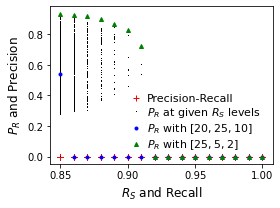

In [107]:
fig=plt.figure()

fig.set_size_inches(4, 3)

for i in range(0, 16):
    if(i==0): #questo stampa la legenda
        plt.plot(alpha[:, 3+i], alpha[:, 19+i],color='red', marker='+', linestyle='None', label='Precision-Recall')
        plt.plot(alpha[:, 3+i], alpha[:, 35+i],color='black', marker=',', linestyle='None', label='$P_R$ at given $R_S$ levels')
    else:
        plt.plot(alpha[:, 3+i], alpha[:, 19+i],color='red', marker='+', linestyle='None')
        plt.plot(alpha[:, 3+i], alpha[:, 35+i],color='black', marker=',', linestyle='None')

plt.plot(alpha[TARGET_SETTING, 3:19], alpha[TARGET_SETTING, 35:51],color='blue', marker='.', linestyle='None', label='$P_R$ with $[20, 25, 10]$')
plt.plot(alpha[TARGET_SETTING_2, 3:19], alpha[TARGET_SETTING_2, 35:51],color='green', marker='^', markersize=4,
         linestyle='None', label='$P_R$ with $[25, 5, 2]$')

#plt.title("$d=0.5$", fontsize=14)    
plt.xlabel("$R_S$ and Recall", fontsize=12)    
plt.ylabel("$P_R$ and Precision", fontsize=12)
plt.legend(loc= 'lower right',
           fontsize=11,
           framealpha=0,
           borderpad=0.6,
           labelspacing=0.2,
           borderaxespad=0.5,
           handletextpad=0.01,
          )

locs, lab = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0.85, 1, step=0.05))

plt.savefig('paper-images/superplot-05.svg')
plt.show()


In [304]:
y=y6
dist_selected=dist[1]
recall_crit=[0.85,0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]

In [305]:
data1=sorted(data[y_tot.index(y)]) #1500 samples

In [306]:
alpha=np.zeros([1500, 51], dtype=float)  #alpha is structure as:
                                        #0: MAX_DISTANCE_OBJ
                                        #1: MAX_DISTANCE_INTERSECT
                                        #2: MAX_TIME_INTERSECT
                                        #3-18: rec_crit 0.85, 0.9, 0.95, 1.0
                                        #19-34: prec
                                        #35-50: prec_crit
found="9999" #default
for i in range(0,1500):
    f = open(data1[i],)
    jsonfiles=json.load(f)
    m = re.search('iteration_(.+?)/', data1[i])
    if m:
        found = m.group(1)
        f1 = open(path + "/"+y+"/DATA/iteration_"+found+"/README_CONFIG.txt",'r')
        for line in f1:
            fields = line.strip().split()
            if(fields[0]=='MAX_DISTANCE_OBJ'):
                alpha[i][0]=int(fields[1])
            if(fields[0]=='MAX_DISTANCE_INTERSECT'):
                alpha[i][1]=int(fields[1])
            if(fields[0]=='MAX_TIME_INTERSECT'):
                alpha[i][2]=int(fields[1])
        f1.close()

    a=jsonfiles[dist_selected]['recall_crit']
    a=np.around(a, decimals=2)
    b=jsonfiles[dist_selected]['precision_crit']
    c=jsonfiles[dist_selected]['precision'] 
    for L in range(0, 16):    
        alpha[i][3+L]=recall_crit[L] #default value
        alpha[i][19+L]=c[np.where(a == recall_crit[L])[0][0]]
        alpha[i][35+L]=b[np.where(a == recall_crit[L])[0][0]]
    f.close()

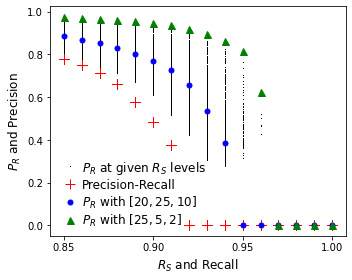

In [330]:
fig=plt.figure()

fig.set_size_inches(5, 4)

for i in range(0, 16):
    if(i==0): #questo stampla la legenda
        plt.plot(alpha[:, 3+i], alpha[:, 35+i],color='black', marker=',',markersize=10,
                 linestyle='None', label='$P_R$ at given $R_S$ levels')
        plt.plot(alpha[:, 3+i], alpha[:, 19+i],color='red', 
                 marker='+', markersize=10,
                 linestyle='None', label='Precision-Recall')
    else:
        plt.plot(alpha[:, 3+i], alpha[:, 35+i],color='black', marker=',', markersize=10,
                 linestyle='None')
        plt.plot(alpha[:, 3+i], alpha[:, 19+i],color='red', marker='+', linestyle='None', markersize=10)

plt.plot(alpha[TARGET_SETTING, 3:19], alpha[TARGET_SETTING, 35:51],color='blue', marker='.', markersize=10,
         linestyle='None', label='$P_R$ with $[20, 25, 10]$')
plt.plot(alpha[TARGET_SETTING_2, 3:19], alpha[TARGET_SETTING_2, 35:51],color='green',marker='^', markersize=7,
         linestyle='None', label='$P_R$ with $[25, 5, 2]$')

#plt.title("$d=1.0$", fontsize=14)    
plt.xlabel("$R_S$ and Recall", fontsize=12)    
plt.ylabel("$P_R$ and Precision", fontsize=12)
plt.legend(loc= 'lower left',
           fontsize=12,
           framealpha=0,
           borderpad=0.6,
           labelspacing=0.2,
           borderaxespad=0.0,
           handletextpad=0.01)

locs, lab = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0.85, 1, step=0.05))

plt.savefig('paper-images/superplot-10.png')
plt.show()


In [331]:
y=y6
dist_selected=dist[2]
recall_crit=[0.85,0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]

In [332]:
data1=sorted(data[y_tot.index(y)]) #1500 samples

In [333]:
alpha=np.zeros([1500, 51], dtype=float)  #alpha is structure as:
                                        #0: MAX_DISTANCE_OBJ
                                        #1: MAX_DISTANCE_INTERSECT
                                        #2: MAX_TIME_INTERSECT
                                        #3-18: rec_crit 0.85, 0.9, 0.95, 1.0
                                        #19-34: prec
                                        #35-50: prec_crit
found="9999" #default
for i in range(0,1500):
    f = open(data1[i],)
    jsonfiles=json.load(f)
    m = re.search('iteration_(.+?)/', data1[i])
    if m:
        found = m.group(1)
        f1 = open(path + "/"+y+"/DATA/iteration_"+found+"/README_CONFIG.txt",'r')
        for line in f1:
            fields = line.strip().split()
            if(fields[0]=='MAX_DISTANCE_OBJ'):
                alpha[i][0]=int(fields[1])
            if(fields[0]=='MAX_DISTANCE_INTERSECT'):
                alpha[i][1]=int(fields[1])
            if(fields[0]=='MAX_TIME_INTERSECT'):
                alpha[i][2]=int(fields[1])
        f1.close()

    a=jsonfiles[dist_selected]['recall_crit']
    a=np.around(a, decimals=2)
    b=jsonfiles[dist_selected]['precision_crit']
    c=jsonfiles[dist_selected]['precision'] 
    for L in range(0, 16):
        alpha[i][3+L]=recall_crit[L] #default value
        alpha[i][19+L]=c[np.where(a == recall_crit[L])[0][0]]
        alpha[i][35+L]=b[np.where(a == recall_crit[L])[0][0]]
    f.close()

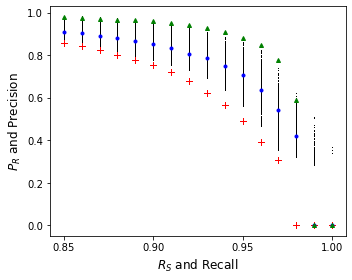

In [344]:
fig=plt.figure()

fig.set_size_inches(5, 4)

for i in range(0, 16):
    if(i==0): #questo stampla la legenda
        plt.plot(alpha[:, 3+i], alpha[:, 35+i],color='black', marker=',', linestyle='None', label='$P_R$ at given $R_S$ levels')
        plt.plot(alpha[:, 3+i], alpha[:, 19+i],color='red', marker='+', linestyle='None', label='Precision-Recall')
    else:
        plt.plot(alpha[:, 3+i], alpha[:, 35+i],color='black', marker=',', linestyle='None')
        plt.plot(alpha[:, 3+i], alpha[:, 19+i],color='red', marker='+', linestyle='None')

plt.plot(alpha[TARGET_SETTING, 3:19], alpha[TARGET_SETTING, 35:51],color='blue', marker='.', linestyle='None', label='$P_R$ with $[20, 25, 10]$')
plt.plot(alpha[TARGET_SETTING_2, 3:19], alpha[TARGET_SETTING_2, 35:51],color='green', marker='^', markersize=4,
         linestyle='None', label='$P_R$ with $[25, 5, 2]$')

plt.legend(loc= 'lower left', fontsize=11,framealpha=0, borderpad=0.6, labelspacing=0.2, borderaxespad=0.1,handletextpad=0.01)

plt.xlabel("$R_S$ and Recall", fontsize=12)    
plt.ylabel("$P_R$ and Precision", fontsize=12)
locs, lab = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0.85, 1, step=0.05))

plt.savefig('paper-images/superplot-15.svg')
plt.show()


In [335]:
np.argmax(alpha[:, 49])

890

In [336]:
alpha[890, 49], alpha[890, 0],alpha[890, 1],alpha[890, 2]

(0.3624741700130462, 5.0, 20.0, 2.0)

In [410]:
y=y6
dist_selected=dist[3]
recall_crit=[0.85,0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]

In [411]:
data1=sorted(data[y_tot.index(y)]) #1500 samples

In [412]:
len(recall_crit)

16

In [413]:
r=0 #just to find index of D, I, T in alpha
for i in alpha:
    tmp=i
    if (tmp[0]==20 and tmp[1]==25 and tmp[2]==4):
        print(r)
        TARGET_SETTING=r
    r=r+1

959


In [414]:
r=0 #just to find index of D, I, T in alpha
for i in alpha:
    tmp=i
    if (tmp[0]==25 and tmp[1]==5 and tmp[2]==2):
        print(r)
        TARGET_SETTING_2=r
    r=r+1

1058


In [415]:
alpha=np.zeros([1500, 51], dtype=float)  #alpha is structure as:
                                        #0: MAX_DISTANCE_OBJ
                                        #1: MAX_DISTANCE_INTERSECT
                                        #2: MAX_TIME_INTERSECT
                                        #3-18: rec_crit 0.85, 0.9, 0.95, 1.0
                                        #19-34: prec
                                        #35-50: prec_crit
found="9999" #default
for i in range(0,1500):
    f = open(data1[i],)
    jsonfiles=json.load(f)
    m = re.search('iteration_(.+?)/', data1[i])
    if m:
        found = m.group(1)
        f1 = open(path + "/"+y+"/DATA/iteration_"+found+"/README_CONFIG.txt",'r')
        for line in f1:
            fields = line.strip().split()
            if(fields[0]=='MAX_DISTANCE_OBJ'):
                alpha[i][0]=int(fields[1])
            if(fields[0]=='MAX_DISTANCE_INTERSECT'):
                alpha[i][1]=int(fields[1])
            if(fields[0]=='MAX_TIME_INTERSECT'):
                alpha[i][2]=int(fields[1])
        f1.close()

    a=jsonfiles[dist_selected]['recall_crit']
    a=np.around(a, decimals=2)
    b=jsonfiles[dist_selected]['precision_crit']
    c=jsonfiles[dist_selected]['precision'] 
    for L in range(0, 16):
        alpha[i][3+L]=recall_crit[L] #default value
        alpha[i][19+L]=c[np.where(a == recall_crit[L])[0][0]]
        alpha[i][35+L]=b[np.where(a == recall_crit[L])[0][0]]
    f.close()

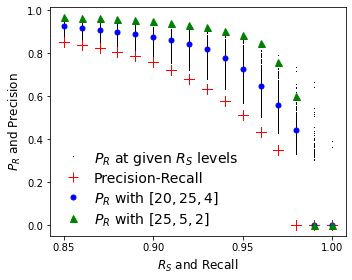

In [416]:
fig=plt.figure()

fig.set_size_inches(5, 4)

for i in range(0, 16):
    if(i==0): #questo stampa la legenda
        plt.plot(alpha[:, 3+i], alpha[:, 35+i],color='black', marker=',', linestyle='None',
                 label='$P_R$ at given $R_S$ levels',markersize=10)
        plt.plot(alpha[:, 3+i], alpha[:, 19+i],color='red', marker='+', linestyle='None', label='Precision-Recall',markersize=10)
    else:
        plt.plot(alpha[:, 3+i], alpha[:, 35+i],color='black', marker=',', linestyle='None',markersize=10)
        plt.plot(alpha[:, 3+i], alpha[:, 19+i],color='red', marker='+', linestyle='None',markersize=10)

plt.plot(alpha[TARGET_SETTING, 3:19], alpha[TARGET_SETTING, 35:51],color='blue', marker='.', linestyle='None',markersize=10,
         label='$P_R$ with $[20, 25, 4]$')
plt.plot(alpha[TARGET_SETTING_2, 3:19], alpha[TARGET_SETTING_2, 35:51],color='green', marker='^', markersize=7,
         linestyle='None', label='$P_R$ with $[25, 5, 2]$')

#plt.title("$d=4.0$", fontsize=14)    
plt.xlabel("$R_S$ and Recall", fontsize=12)    
plt.ylabel("$P_R$ and Precision", fontsize=12)
plt.legend(loc= 'lower left',
           fontsize=14,
           framealpha=0,
           borderpad=0.6,
           labelspacing=0.3,
           borderaxespad=0.0,
           handletextpad=0.5)



locs, lab = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0.85, 1, step=0.05))

plt.savefig('paper-images/superplot-40.png')
plt.show()


just to get the configurations D, I, T with $P_R \geq 0$ when $R_S =1.00$, for dist_h=4.0

In [383]:
for i in alpha:
    if (i[50] >0.0):
        print (i)

[ 5.         15.          2.          0.85        0.86        0.87
  0.88        0.89        0.9         0.91        0.92        0.93
  0.94        0.95        0.96        0.97        0.98        0.99
  1.          0.85627073  0.84136259  0.82197059  0.80050022  0.77772751
  0.75180594  0.72079916  0.67723026  0.62342023  0.56381875  0.48841192
  0.39361184  0.30630264  0.          0.          0.          0.91765918
  0.91357822  0.90767705  0.89998964  0.8906167   0.87986017  0.86829391
  0.85097782  0.83138412  0.80916248  0.78420872  0.74674398  0.69325759
  0.60472347  0.50639653  0.36377074]
[ 5.         20.          2.          0.85        0.86        0.87
  0.88        0.89        0.9         0.91        0.92        0.93
  0.94        0.95        0.96        0.97        0.98        0.99
  1.          0.85627073  0.84136259  0.82197059  0.80050022  0.77772751
  0.75180594  0.72079916  0.67723026  0.62342023  0.56381875  0.48841192
  0.39361184  0.30630264  0.          0.         

Computation of nuScenes AVERAGE VELOCITY ERROR (AVE)

For comparison, we also estimate AVE for the $dist_{th}$=[0.5, 1.0, 2.0, 4.0]



In [123]:
#if the above path is set properly, here you should change nothing
text_files = glob.glob(path + "/**/DATA/iteration_0/metrics_details.json", 
                       recursive = False)


In [124]:
import json
import os

def process_json(jobj, distth):
    sum_tot=0
    counter=0
    for i in jobj[distth]['vel_err']:
        sum_tot=sum_tot+i
        counter=counter+1
    return sum_tot/counter

print("dist_th car:0.5")
for i in text_files:
    path1 = os.path.normpath(i)
    path1=path1.split(os.sep)
    with open(i, 'r') as openfile:
        json_object=json.load(openfile)
        AVE=process_json(json_object, 'car:0.5')
        print("{} {}".format(path1[1], AVE))

print("\n dist_th car:1.0")
for i in text_files:
    path1 = os.path.normpath(i)
    path1=path1.split(os.sep)
    with open(i, 'r') as openfile:
        json_object=json.load(openfile)
        AVE=process_json(json_object, 'car:1.0')
        print("{} {}".format(path1[1], AVE))

print("\n dist_th car:2.0")
for i in text_files:
    path1 = os.path.normpath(i)
    path1=path1.split(os.sep)
    with open(i, 'r') as openfile:
        json_object=json.load(openfile)
        AVE=process_json(json_object, 'car:2.0')
        print("{} {}".format(path1[1], AVE))

print("\n dist_th car:4.0")
for i in text_files:
    path1 = os.path.normpath(i)
    path1=path1.split(os.sep)
    with open(i, 'r') as openfile:
        json_object=json.load(openfile)
        AVE=process_json(json_object, 'car:4.0')
        print("{} {}".format(path1[1], AVE))
        

dist_th car:0.5
regnet-regnetX_400MF-SECFPN 0.19774396641479666
ssn-SECFPN 0.27090248298122305
regnet-regnetX_FPN 0.1841283198847797
pgd 1.2790436691984535
FCOSD-RESNET101 1.847824697426632
pointpillars-secfpn 0.24175608122058173
ssn-REGNET 0.23411826265431832
pointpillars-fpn 0.23587741090678924
regnet-regnetX_400MF-FPN 0.22166756849907066

 dist_th car:1.0
regnet-regnetX_400MF-SECFPN 0.2038986435362832
ssn-SECFPN 0.27714176798407325
regnet-regnetX_FPN 0.18930762989739275
pgd 1.2702228087746261
FCOSD-RESNET101 1.8924570190993908
pointpillars-secfpn 0.2507084312979195
ssn-REGNET 0.23912921059114692
pointpillars-fpn 0.24286912894434096
regnet-regnetX_400MF-FPN 0.22863586620489224

 dist_th car:2.0
regnet-regnetX_400MF-SECFPN 0.20673426719039087
ssn-SECFPN 0.2811719156391016
regnet-regnetX_FPN 0.1920234568725468
pgd 1.2801314375022947
FCOSD-RESNET101 1.9488761593014738
pointpillars-secfpn 0.254601548653916
ssn-REGNET 0.2423262409668033
pointpillars-fpn 0.2465908102390805
regnet-regnetX_4